
# RSCAM Computer Assessment 2

In this assessment you will learn to train a neural network from scratch in Python.  You might have explored neural nets before using software packages like pytorch or tensorflow. You need to unlearn all that because in these exercises we will do it all from ground zero.  You will write code that computes the gradient of the network and use this within a gradient descent framework to optimise parameters.


## Single hidden layer perceptron networks 
In these exercises we will use a fairly simple class of 2-layer neural networks called single hidden layer perceptrons or SHLPs. You will apply your network to the XOR gate and to the 3-input XOR gate given by 
$$ y = x_1 \, {\rm XOR} \, x_2 \, {\rm XOR} \, x_3. $$  Later, we will try a more complicated case.

We will make a general framework for SHLPs.  This can be used for lots of different kinds of problems.
There are $k_0$ real inputs.  There are $k_1$ 'hidden nodes'.  And then there is a single  output node.  This type of network can be used for many different purposes, including classication and regression.   We can identify the network structure by the three indices, so we will talk about a $(k_0,k_1,1)$ network.  For example a $(2, 4, 1)$ network has two inputs, 4 hidden nodes, and 1 output node.  The nodes of the network have edges connecting them.  We will assume the network is fully connected, which means all the input nodes are connected to all the hidden nodes and all the hidden nodes to the single output node.    We will introduce some internal variables that represent the state of the network.  The inputs are $x_i$, $i=1,2,\ldots, k_0$.   The $j$th hidden node has an associated node value $z_j$, where $j\in \{1,2,\ldots,k_1\}$.   The output is $y$.  

The weights of the network are the coefficients of linear functions that take us from one layer to the next.   Let $w^{(1)}_{ij}$ represent the weight on the edge linking node $i$ of the input layer to node $j$ of the hidden layer (the first layer).    We also allow for a bias coefficient at each node. So
$$ 
z_j = \varphi \left(\sum_{i=1}^{k_0} w^{(1)}_{ji} x_i + b^{(1)}_j \right ),
$$
where $\varphi$ is an activation function such as the ReLU function.   We can also write this in the compact form
$$
z = \varphi \left ( W_1^T x + b_1 \right ),
$$
where we write $W_1 = (w_{ij}) \in \mathbb{R}^{k_0\times k_1}$ and view $W_1^T x$ as matrix-vector multiplication and we assume that the scalar function $\varphi$ acts component-wise on an input vector.

The outputs are to be obtained via a sigmoidal output function.  As an intermediate step we compute $v$ using an affine operation in terms of the hidden node values:
$$
v = \sum_{j=1}^{k_1} w^{(2)}_{j} z_j + b^{(2)}.
$$
In vectorial notation, we will write this as  $v = W_2^Tz + b_2$, where $W_2$ is a vector of dimension $k_1$ and $b_2$ is a scalar.  Then these are fed into the sigmoidal to compute the network output $y$.  Specifically
$$ 
y = \frac{1}{1+\exp(-v)}.
$$

We write this as $y = \sigma(v)$.  Thus the whole neural network has the expression

$$
y = \sigma\left ( W_2^T \varphi \left ( W_1^T x + b_1 \right ) + b_2 \right ),
$$

or

$$
y = \Phi(x,\theta),
$$

where $\theta = (W_1,W_2, b_1, b_2)$.   Since $W_1 \in \mathbb{R}^{k_0 \times k_1}$ and $W_2 \in \mathbb{R}^{k_1}$ and $b_1\in \mathbb{R}^{k_1}$ and $b_2 \in \mathbb{R}$ we see that $\theta$ consists of $k_0 \times k_1 + k_1+ k_1 + 1=k_1(k_0+2)+1$ coefficients.

If you are applying such a network to the 3-input XOR gate you would have 3 inputs ($k_0=3$) and a single output but $k_1$ could be any positive integer.  One of the exercises will be to study the effect of increasing the number of hidden nodes.

## Evaluating the network
Here we write a python function which takes the following arguments: (integers) k0, k1, (real vector) x, (real vector) theta
and produces y by evaluating the above formula.  You can either assume that x and theta have the correct dimensions or check this in your function and halt with an error if the wrong dimensions are detected.  You will need to select subvectors of theta and turn them into matrices and vectors representing the different coefficient parts using numpy.reshape in order to get them into the right form to perform the relevant matrix-vector multiplies.  Try to make your code as simple and efficient as possible.

Test the neural network function for both the XOR gate and the 3-input XOR gate (y = x1 XOR x2 XOR x3). You don't know what the parameters of your network should be  in advance so just use some random numbers and check that it produces objects with correct dimensions.  

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import multiprocessing as mp

In [6]:
def phi_relu(x):
    return np.maximum(0,x)
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))
def unpack_theta(k0,k1,theta):
    # compute the index
    w1_end_index =  k0*k1
    w2_end_index = (k0*k1) + k1
    b1_end_index = (k0*k1) + 2*k1
    # extract the values 
    w1 = theta[0:w1_end_index].reshape(k1,k0)
    w2 = theta[w1_end_index: w2_end_index]
    b1 = theta[w2_end_index : b1_end_index]
    b2 = theta[-1]
    return w1, w2,b1,b2

def neural_network(k0, k1, x, theta):
    # k0 real inputs 
    # k1 hind networks
    w1,w2,b1,b2 = unpack_theta(k0,k1, theta)

    ## Hidden layer 
    u1 = np.dot(w1,x) + b1    
    z1 = sigmoid(u1) # hidden layer outputs

    ## Outputs layers 
    u2 = np.dot( w2.T , z1) +b2 
    z2 = sigmoid(u2) # output

    ## test print 
    # print(f'x {x}')
    # print(f'w1 {w1}')
    # print(f'w2 {w2}')
    # print(f'b1 {b1}')
    # print(f'b2 {b2}')
    # print(f'u1 {u1}')
    # print(f'z1 {z1}')
    # print(f'u2 {u2}')
    return z2

################################
##### NN to test against. ##### 
################################
def sig_act(s):
    return 1.0 / (1.0 + math.exp(-s))
def ref_2NN(k0,k1,x,theta):
# compute 2-layer planar perceptron classifier for given inputs x1, x2
# parameter theta: a nine component vector

# change to weight, bias notation
    w11 = theta[0]; w12 = theta[1]; w21 = theta[2]; w22 =theta[3]
    w31 = theta[4]; w32 = theta[5]; b1 = theta[6]; b2=theta[7]; b3=theta[8]
    x1=x[0] ; x2=x[1]

    u1 = w11*x1 + w12*x2 + b1
    u2 = w21*x1 + w22*x2 + b2
    
    z1 = sig_act(u1)            # hidden node outputs
    z2 = sig_act(u2)


    u3 = w31*z1 + w32*z2 +b3    # 2nd layer
    
    out = sig_act(u3)         # output

    return(out)
    
def ref_3NN(k0,k1,x,theta):
# compute 2-layer planar perceptron classifier for given inputs x1, x2
# parameter theta: a nine component vector

# change to weight, bias notation
    # W1 2x3 
    w11 = theta[0]; w12 = theta[1];
    w21 = theta[2]; w22 =theta[3];
    w31 = theta[4]; w32 = theta[5];
    # W2 1x3 
    w41 = theta[6]; w42 =theta[7]; w43=theta[8];
    # B1 1x3 
    b1 = theta[9]; b2=theta[10]; b3=theta[11]
    # B2 1 
    b4 = theta[12]
    
    x1=x[0] ; x2=x[1]

    u1 = w11*x1 + w12*x2 + b1
    u2 = w21*x1 + w22*x2 + b2
    u3 = w31*x1 + w32*x2 + b3

    #print(f'u1 {u1} {u2} {u3}')
    
    z1 = sig_act(u1)            # hidden node outputs
    z2 = sig_act(u2)
    z3 = sig_act(u3)

    u4 = w41*z1 + w42*z2 + w43*z3 +b4    # 2nd layer
    # print(f' u2 {u4} ')
    
    out = sig_act(u4)         # output

    ### test print 
    # print(f'w1 : {w11} {w12}')
    # print(f'w2 : {w21} {w22}')
    # print(f'w3 : {w31} {w32}')
    # print(f'u1 {u1} {u2} {u3}')
    # print(f'z1 {z1} {z2} {z3}')
    # print(f'W2 : {w41} {w42} {w43}')
    # print(f'u4 {u4}')
    
    return(out)

In [3]:
################################
### Test neural_network  #######
################################
k0 = 2
k1 = 2
dim_theta= k1*(k0 +2) +1
theta = np.random.rand(dim_theta) 
x =  np.array([1,1])
print(f'2NN : { neural_network(k0,k1,x, theta) == ref_2NN(k0,k1,x, theta)}')
## (2,3)
k0 = 2
k1 = 3
dim_theta= k1*(k0 +2) +1
theta = np.random.rand(dim_theta) 
x =  np.array([1,1])
print(f'3NN : { neural_network(k0,k1,x, theta) == ref_3NN(k0,k1,x, theta)}')

2NN : True
3NN : True


## Evaluating the gradient
In order to compute gradient descent steps, you will need to compute gradients of the loss.  The main task in computing the loss gradient is to compute the gradient of the network with respect to its coefficients.

You can figure out some simple rules to help evaluate the gradient of y with respect to the coefficients.  It helps to use the intermediate variables z, v that were introduced before. For example 
$$dy/db_2 = \sigma ' (v).$$

So far so good!  Next, noting that $y=\sigma(W_2^T z)$, we have:

$$\frac{\partial y}{\partial W_2} = \sigma'(v)*z. $$

Still pretty easy.  Here we have used the notation $\frac{\partial y}{\partial W_2}$ to indicate the gradient of function $y$ with respect to $W_2$.  The next terms after this require you to use the chain rule. 

Figure out the relevant expressions using paper  and pencil (or pad and stylus).  Then write a python function that computes the gradient vector of the network output $y$ with respect to the parameter vector $\theta$.  


Here we compute the gradient for
$$
y = \sigma( W_{2}^{T} \phi( W_{1}^{1} x + b_{1} ) + b_{2} )
$$
Hence we compute:
For 
$$
\frac{d y}{d W_{1} } = W_{2} \varphi{'( w_{1} x + b_{1} )} x \sigma{'( w_{2} \varphi{( w_{1} x + b_{1} )} +b_{2}) }
$$
Then for
$$
\frac{d y}{d W_{2} } = \varphi{( w_{1} x + b_{1} )} \sigma{'( w_{2} \varphi{( w_{1} x + b_{1} )} +b_{2}) }
$$
Then 
$$ 
\frac{d y}{d b_{1} } =  w_{2} \varphi{'( w_{1} x + b_{1} )} \sigma{'( w_{2} \varphi{( w_{1} x + b_{1} )} +b_{2}) }
$$
Then 
$$
\frac{d y}{d b_{2} } = \sigma{'( w_{2} \varphi{( w_{1} x + b_{1} )} +b_{2}) }
$$ 

We will use the mean square loss to evaluate our network's performance with given parameters $\theta$.  We assume there is a set of training data which is stored as a matrix tdata whose $m$ rows consist of entries in the form 
$$\left [ x_{i,1}, x_{i,2}, .., x_{i,k_0}, y_i\right ].$$
This is therefore an $m\times (k_0+1)$ dimensional array.

Then we evaluate the loss over the training data (i.e., the training loss) by calculating the mean square error of the network over all the training examples, i.e. 
$$
L(\theta) = m^{-1} \sum_{i=1}^m (y(x_i, \theta)- y_i)^2,
$$
where $y(x, \theta)$ represents the neural network output for input $x$ and parameters $\theta$.

Using your previous work, write a function that, given the dimensions k0 and k1 and the parameters of the network outputs the loss.   



In [7]:
## Ex 1d. 
def calculate_loss(k0, k1, theta): 
    res = 0.0
    res_squared = 0.0
    for i in range(len(tdata)): # m is the trainning data size 
        x_i = tdata[i][:-1] # take all x data from training data array 
        c_i = tdata[i][-1]  # The output for x_i 
        res += ( neural_network(k0,k1, x_i, theta) - c_i )
        res_squared += res**2
    total_loss = res_squared/len(tdata)
    return total_loss


Using your previous work, write a function that, given the dimensions k0 and k1 and the parameter vector theta outputs the gradient of the training loss. 


In [8]:
####
# Ex 1e. 
###
def sigmoid_prime(x):
    return sigmoid(x) *(1- sigmoid(x)) 

def gradient_loss_function(k0, k1, theta): 
    # Unpack values of theta 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta) 
    # allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss =0.0

    for i in range(len(tdata)): 
        ## Training data 
        xi = tdata[i][:-1] # take all x data from training data array 
        yi = tdata[i][-1] # The output for x_i 
        ## Hidden layer 
        u1 = np.dot(W1,xi) + b1    
        z1 = sigmoid(u1) # hidden layer outputs
        ## Outputs layers 
        u2 = np.dot( W2.T , z1) +b2 
        z2 = sigmoid(u2) # output
        ## loss 
        res = yi - z2
        loss += res*res 
        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 
        ### test prints 
        # print(f'xi {xi} : yi {yi}') 
        # print(f' w1 {W1} ')
        # print(f' b1 {b1} ')
        # print(f' u {u1} ') 
        # print(f' sig u {z1} ') 
        # print(f'vi {u2}') 
        # print(f' out {z2}')
        # print(f' res {res} : loss {loss}')
        # print(f' db2 {db2} : dw2 {dW2}')   
        # print(f' h1 {h1} : h3 {h3}')   
        # print(f'db1 {db1}')
        # print(f' dw1 {dW1} ')
        
    return dW1.ravel()/len(tdata), dW2/len(tdata), db1/len(tdata), np.array([db2])/len(tdata)

## Training the network
We are in a good position now to try to implement gradient descent.   


As a check, you will first code the XOR gate using the new code you have written and compare the results with those  presented in the slides of Lecture 5.  

In [18]:
def p_force(theta): 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta)
    g = np.zeros(dim_theta)
    loss =calculate_loss(k0,k1,theta)
    g = np.concatenate( gradient_loss_function(k0,k1,theta), axis=None )
    #print(f'g :{g}')
    F = -g
    return F,loss
    
def Euler(q_n,h,vector_field):
    F,loss = vector_field(q_n)
    return q_n+h*F, loss
    
def compute_trajectory(q0, Nsteps, h, step_function, vector_field):
    q_traj = [None]*(Nsteps+1)
    t_traj = [None]*(Nsteps+1)
    loss_traj = [None]*(Nsteps+1)

    F,loss = vector_field(q0)
    q_traj[0]= q0
    t_traj[0]=0
    loss_traj[0] = loss

    q=q0.copy()
    t=0

    for n in range(1,Nsteps+1):
        #print(f'####### step {n} #########')
        q,loss = step_function(q,h, vector_field)
        t+=h

        q_traj[n]= q
        t_traj[n]=t
        loss_traj[n] = loss.copy()
        #print(f' step {n-1} : {q} ')

    return q_traj, t_traj, loss_traj


#################################################
####  Functions for plotting Pcolour ############
#################################################
def p_classifier(x1,x2, theta):
    return neural_network(k0,k1, np.array([x1,x2]), theta)
    
def grid_points(rectangle,delx):
    a = rectangle[0]; b=rectangle[1]; c=rectangle[2]; d=rectangle[3]
    x1 = np.arange(a, b+delx, delx)
    x2 = np.arange(c, d+delx, delx)
    x1grid, x2grid = np.meshgrid(x1, x2)
    return x1grid,x2grid

def compute_classifier(x1grid,x2grid,theta):
    # draw a 3-d plot of the classifier generated by
    # the 2-layer pereceptron network
    # domain defined by *rectangle* [a,b,c,d] a<=x1<=b; c<=x2<=d
    # *delx*: increment in each variable (fineness of grid used for plotting)
    # *theta*: parameter vector
    dims = x1grid.shape
    n1 = dims[0]; n2 = dims[1]
    zgrid = np.zeros((n1,n2))
    for i in range(n1):
        for j in range(n2):
            zgrid[i,j] = p_classifier(x1grid[i,j],x2grid[i,j],theta)
    return zgrid



In [19]:
#######################################
### XOR Training ######################
#######################################
tdata =np.array([[0,0,0], [0,1,1], [1,0,1],[1,1,0]]) 
m = len(tdata)
k0 = 2 # Number of input nodes 
k1 = 2 # number of hiddem nodes
dim_theta= k1*(k0 +2) +1
theta_in = np.random.rand(dim_theta) 
theta,t,loss = compute_trajectory(theta_in,1000,1,Euler,p_force)

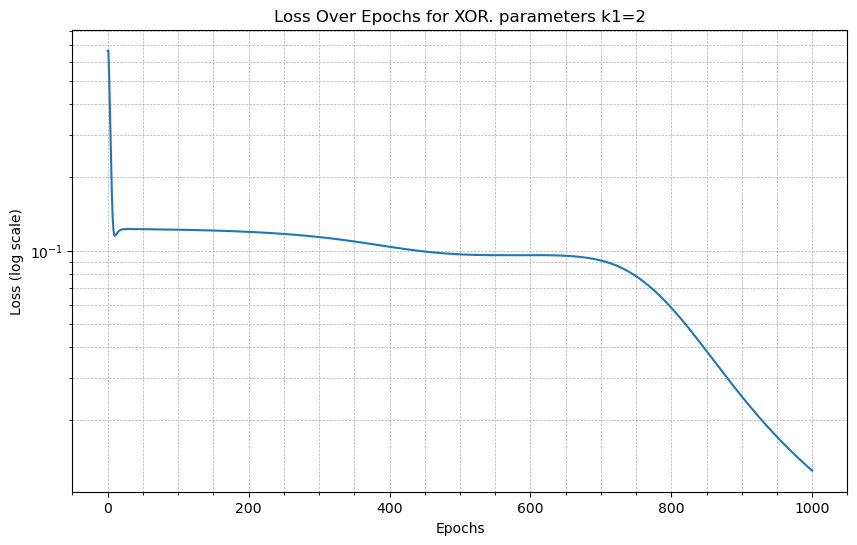

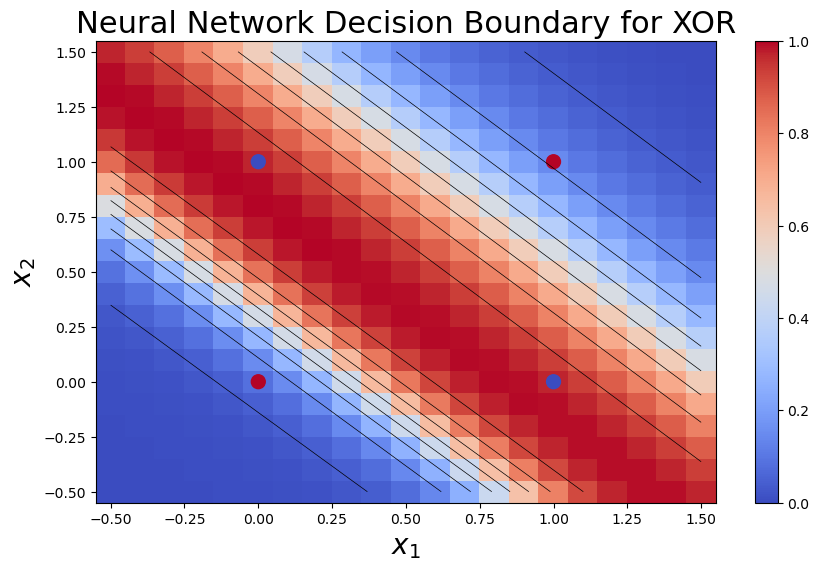

In [21]:
#######################################
### XOR loss plot ####################
#######################################

# Adjust the figure size
plt.figure(figsize=(10, 6))
plt.plot(t, loss)
plt.yscale('log')  # Set y-axis to log scale
plt.title(f'Loss Over Epochs for XOR. parameters k1={k1}')
plt.xlabel('Epochs')
plt.ylabel('Loss (log scale)')
# Add more grid lines
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()

#################################################
####  Plot Pcolour Graph for XOR     ############
#################################################

#calls to grid and classifier computation
x1grid, x2grid = grid_points([-0.5, 1.5,-0.5,1.5],0.1)
zgrid = compute_classifier(x1grid,x2grid,theta[-1])
# Set a colormap that contrasts well for binary classification (e.g., coolwarm)
cmap = plt.get_cmap('coolwarm')
# Plot pcolor and add contour lines
plt.figure(figsize=(10, 6))
plt.pcolor(x1grid, x2grid, zgrid, shading='auto', cmap=cmap)
contour = plt.contour(x1grid, x2grid, zgrid, colors='black', linewidths=0.5)
# Superimpose the data points
plt.scatter(tdata[:, 0], tdata[:, 1], s=100, marker='o', c=1 - tdata[:, 2], cmap=cmap)
plt.xlabel('$x_1$', size=20)
plt.ylabel('$x_2$', size=20)
plt.title('Neural Network Decision Boundary for XOR', size=22)
plt.colorbar()  # Add colorbar for reference
plt.show()

**Exercise 1g [10 marks]**
Train a 3-input XOR gate using your method.  This part is open-ended and individual. You should first get the code working and test the code you have written.  Then explore the training of the 3-input XOR gate. There are many things you can study:  (1) how the training method performs, depending on the stepsize used, e.g. studying the training curves that show the loss as a function of iteration number, (2) what role the initialization plays, (3) how the number of hidden nodes effects the result.  You don't need to study all of these but your answer should comprise about 500 words and include 5-10 graphs.

<div class='alert alert-info'> # Visualizing 3XOR Projection in 2D [Ex1g]. </div>

In this analysis, we explore the projection of the 3XOR task onto a 2D plane by condensing the two input nodes into a single input node. The modified input node now ranges from 0 to 2.
Two Configurations: k1=3 vs. k1=2 Hidden Nodes

## k1=3 Hidden Nodes

In the first plot, we set the number of input nodes as k0=2 and the number of hidden nodes as k1=3. The log loss plot against epochs illustrates a relatively rapid learning rate. Notably, there is a fluctuation in the loss around 1000 epochs, indicated by spikes in the graph. The pcolor plot on the right displays the neural network's decision values, revealing a distinct diagonal stripe pattern formed by the network.

## k1=2 Hidden Nodes

Contrastingly, when running the same test with k1=2 hidden nodes, the learning outcome is suboptimal. The loss converges to a higher value compared to the k1=3 case. In addition, the pcolor plot of the neural network's decision values shows misclassifications, where some points are not correctly classified, and the network tends to assign average values instead. This discrepancy emphasizes the importance of the choice of hidden nodes in achieving effective learning outcomes.


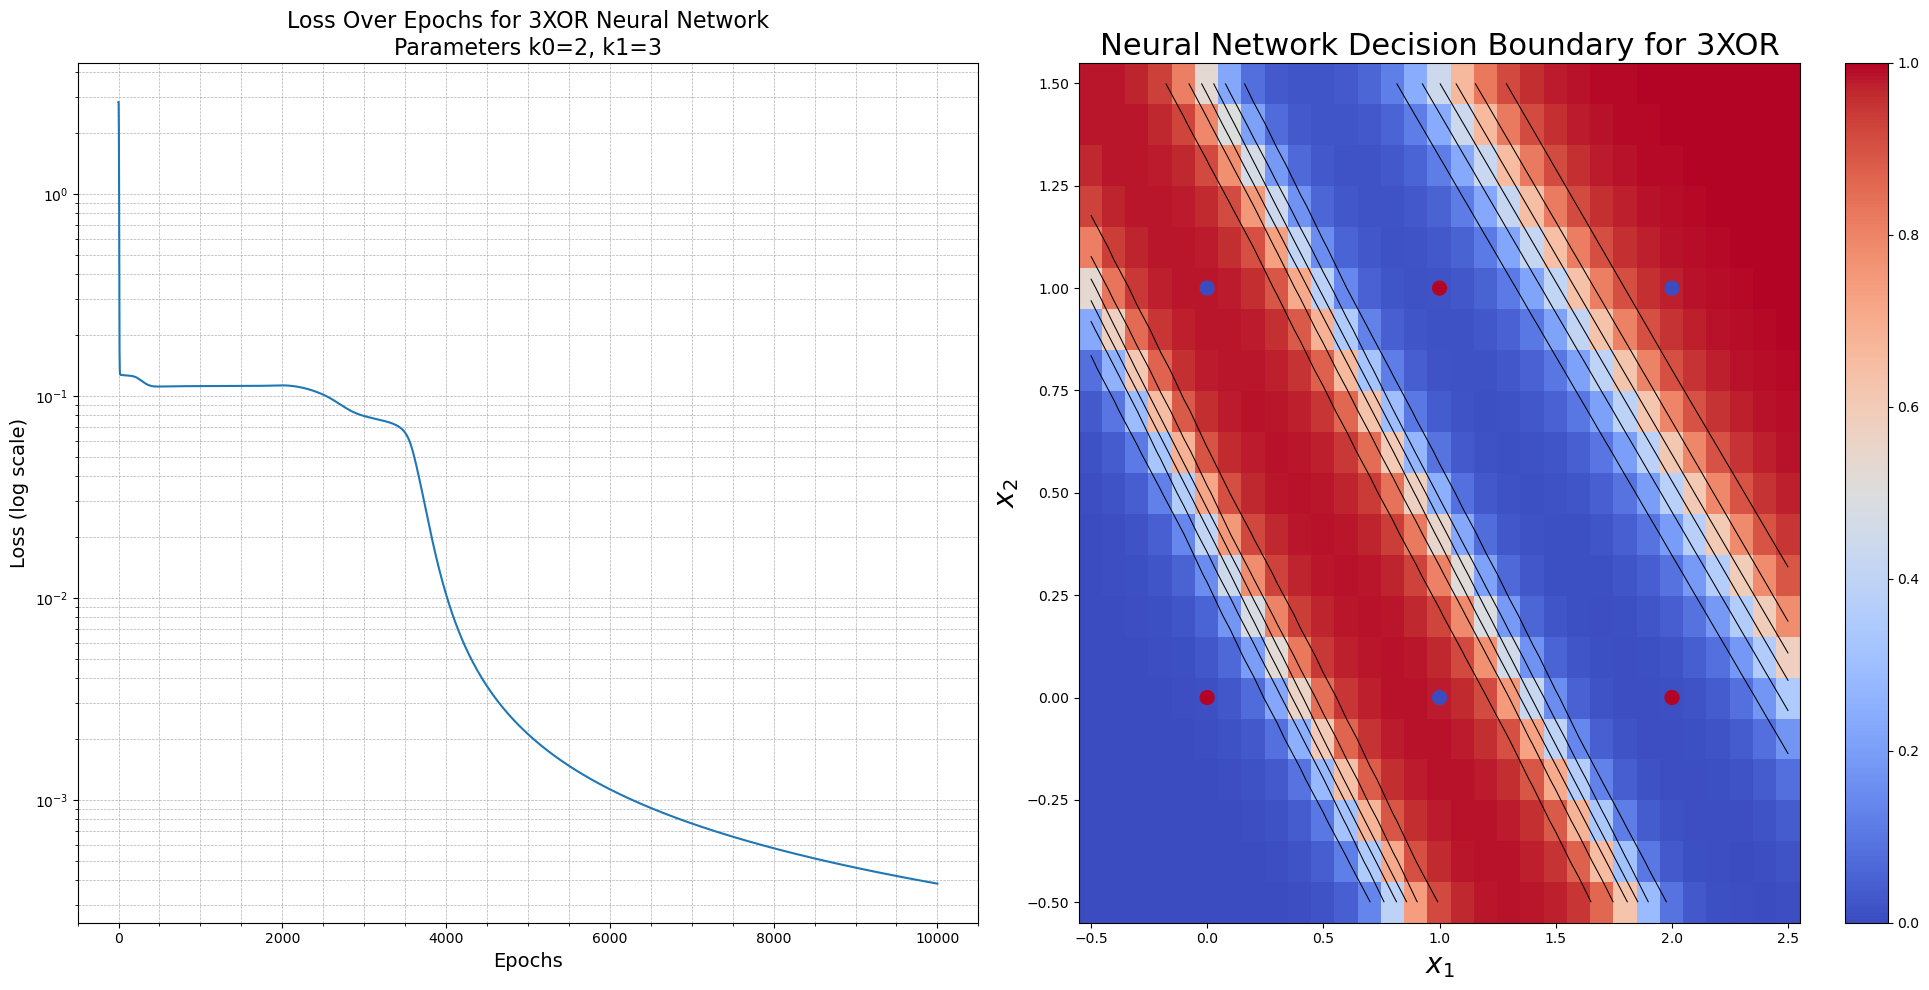

In [22]:
################################################
####     3XOR projection to 2D       ###########
################################################
####  Ex1   P:k0=2, k1=3             ###########
################################################
# tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
tdata  = np.array([[j, k, (j+k)%2 ]  for j in range(3) for k in range(2)])
k0 = 2 # Number of input nodes 
k1 = 3 # number of hiddem nodes
dim_theta= k1*(k0 +2) +1
theta_in = np.random.rand(dim_theta) 
theta,t,loss = compute_trajectory(theta_in,10000,1,Euler,p_force)
figA, axA = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Plot the loss over time
axA[0].plot(t, loss)
axA[0].set_yscale('log')  # Set y-axis to log scale
axA[0].set_title(f'Loss Over Epochs for 3XOR Neural Network\nParameters k0={k0}, k1={k1}', size=16)
axA[0].set_xlabel('Epochs', size=14)
axA[0].set_ylabel('Loss (log scale)', size=14)
axA[0].minorticks_on()
axA[0].grid(which='both', linestyle='--', linewidth=0.5)

# Plot the pcolor plot
x1grid, x2grid = grid_points([-0.5, 2.5, -0.5, 1.5], 0.1)
zgrid = compute_classifier(x1grid, x2grid, theta[-1])
cmap = plt.get_cmap('coolwarm')
pc = axA[1].pcolor(x1grid, x2grid, zgrid, shading='auto', cmap=cmap)
contour = axA[1].contour(x1grid, x2grid, zgrid, colors='black', linewidths=0.75)
sc = axA[1].scatter(tdata[:, 0], tdata[:, 1], s=100, marker='o', c=1 - tdata[:, 2], cmap=cmap)
axA[1].set_xlabel('$x_1$', size=20)
axA[1].set_ylabel('$x_2$', size=20)
axA[1].set_title('Neural Network Decision Boundary for 3XOR', size=22)
cbar = plt.colorbar(sc, ax=axA[1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

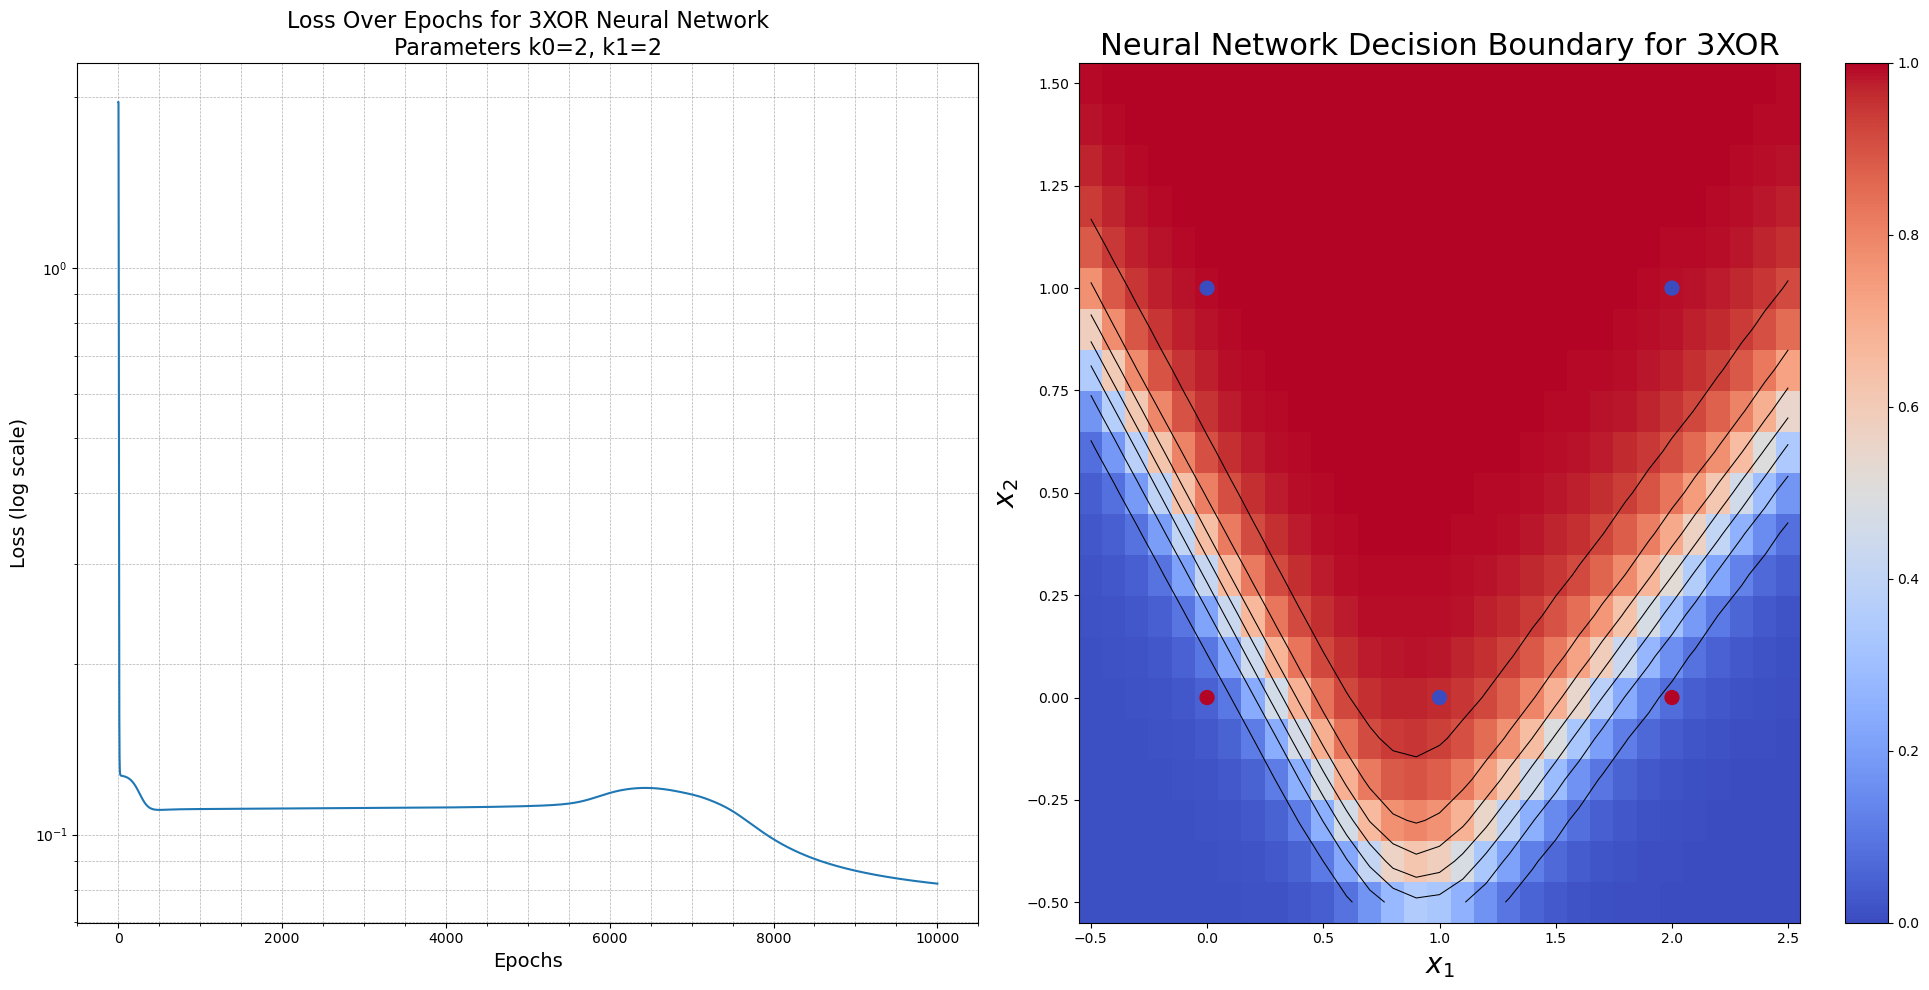

In [26]:
################################################
####     3XOR projection to 2D       ###########
################################################
####  Ex1   P:k0=2, k1=2            ###########
################################################
# tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
tdata  = np.array([[j, k, (j+k)%2 ]  for j in range(3) for k in range(2)])
k0 = 2 # Number of input nodes 
k1 = 2 # number of hiddem nodes
dim_theta= k1*(k0 +2) +1
theta_in = np.random.rand(dim_theta) 
theta,t,loss = compute_trajectory(theta_in,10000,1,Euler,p_force)

figA, axA = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Plot the loss over time
axA[0].plot(t, loss)
axA[0].set_yscale('log')  # Set y-axis to log scale
axA[0].set_title(f'Loss Over Epochs for 3XOR Neural Network\nParameters k0={k0}, k1={k1}', size=16)
axA[0].set_xlabel('Epochs', size=14)
axA[0].set_ylabel('Loss (log scale)', size=14)
axA[0].minorticks_on()
axA[0].grid(which='both', linestyle='--', linewidth=0.5)

# Plot the pcolor plot
x1grid, x2grid = grid_points([-0.5, 2.5, -0.5, 1.5], 0.1)
zgrid = compute_classifier(x1grid, x2grid, theta[-1])
cmap = plt.get_cmap('coolwarm')
pc = axA[1].pcolor(x1grid, x2grid, zgrid, shading='auto', cmap=cmap)
contour = axA[1].contour(x1grid, x2grid, zgrid, colors='black', linewidths=0.75)
sc = axA[1].scatter(tdata[:, 0], tdata[:, 1], s=100, marker='o', c=1 - tdata[:, 2], cmap=cmap)
axA[1].set_xlabel('$x_1$', size=20)
axA[1].set_ylabel('$x_2$', size=20)
axA[1].set_title('Neural Network Decision Boundary for 3XOR', size=22)
cbar = plt.colorbar(sc, ax=axA[1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

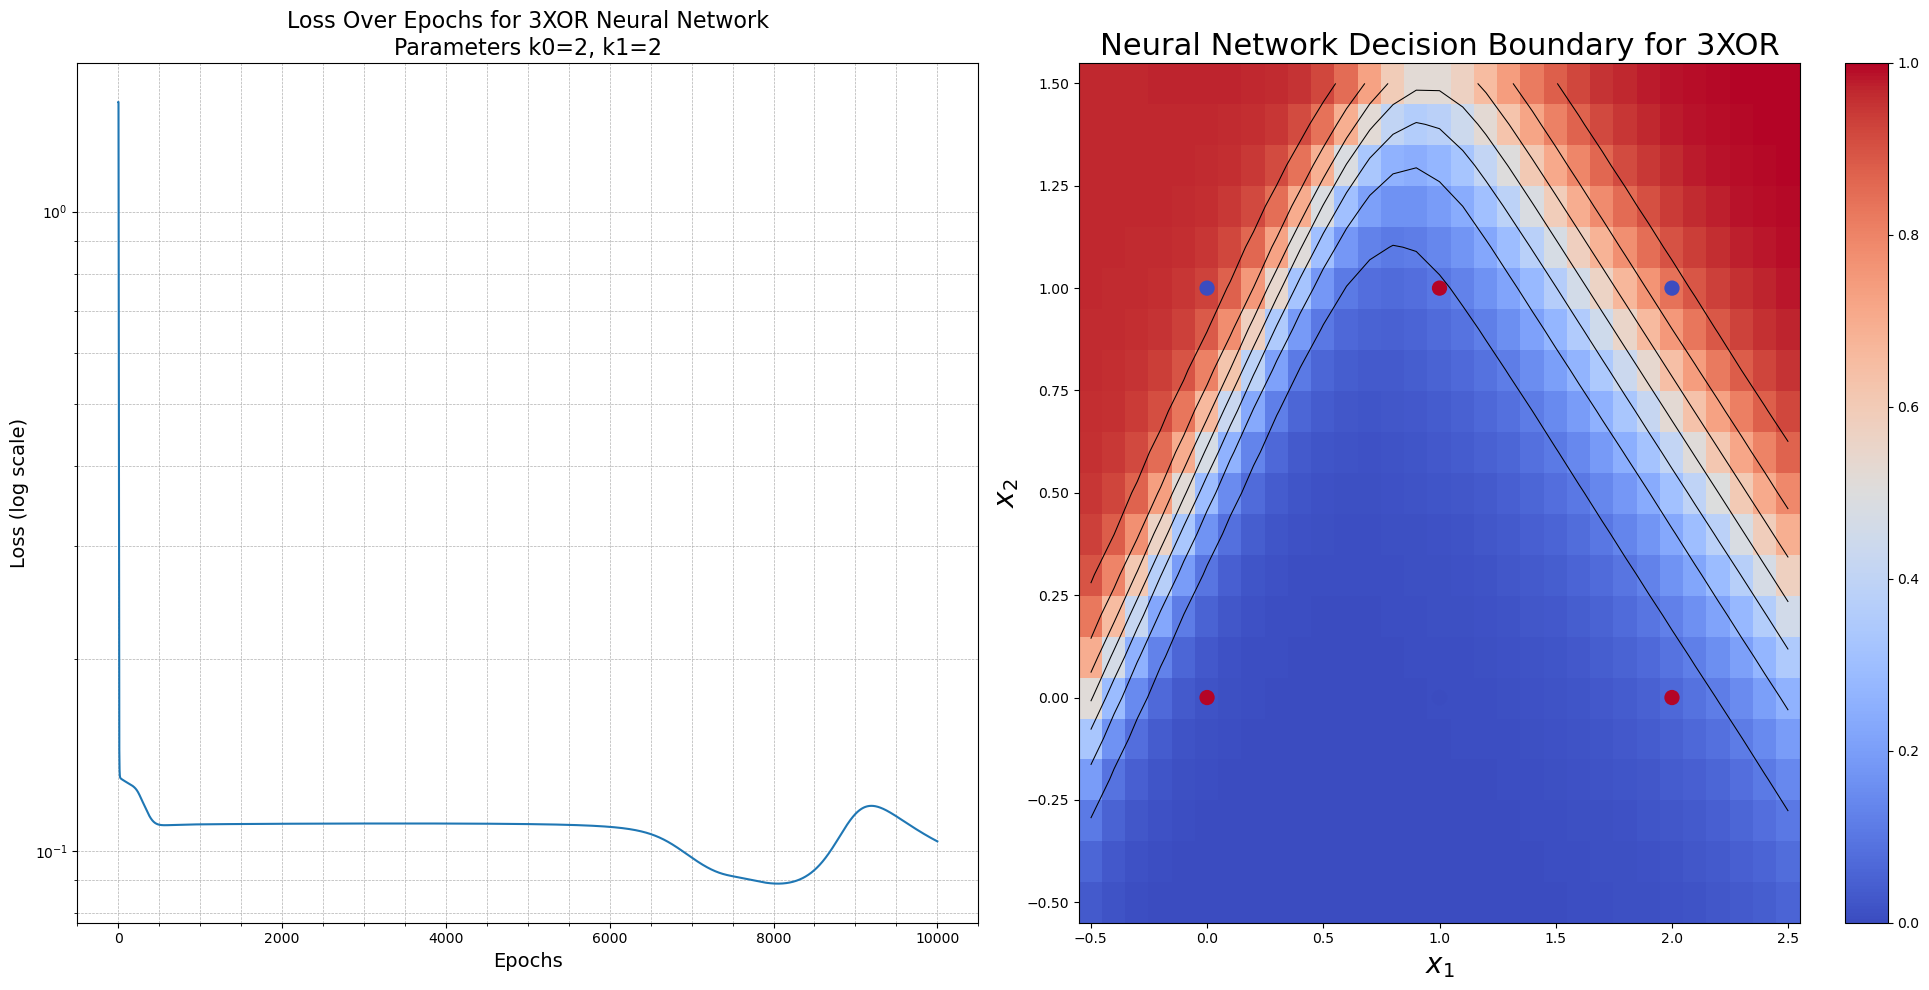

In [42]:
################################################
####     3XOR projection to 2D       ###########
################################################
####  Ex1   P:k0=2, k1=2            ###########
################################################
# tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
tdata  = np.array([[j, k, (j+k)%2 ]  for j in range(3) for k in range(2)])
k0 = 2 # Number of input nodes 
k1 = 2 # number of hiddem nodes
dim_theta= k1*(k0 +2) +1
np.random.seed(994253)
theta_in = np.random.rand(dim_theta) 
theta,t,loss = compute_trajectory(theta_in,10000,1,Euler,p_force)

figA, axA = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
# Plot the loss over time
axA[0].plot(t, loss)
axA[0].set_yscale('log')  # Set y-axis to log scale
axA[0].set_title(f'Loss Over Epochs for 3XOR Neural Network\nParameters k0={k0}, k1={k1}', size=16)
axA[0].set_xlabel('Epochs', size=14)
axA[0].set_ylabel('Loss (log scale)', size=14)
axA[0].minorticks_on()
axA[0].grid(which='both', linestyle='--', linewidth=0.5)

# Plot the pcolor plot
x1grid, x2grid = grid_points([-0.5, 2.5, -0.5, 1.5], 0.1)
zgrid = compute_classifier(x1grid, x2grid, theta[-1])
cmap = plt.get_cmap('coolwarm')
pc = axA[1].pcolor(x1grid, x2grid, zgrid, shading='auto', cmap=cmap)
contour = axA[1].contour(x1grid, x2grid, zgrid, colors='black', linewidths=0.75)
sc = axA[1].scatter(tdata[:, 0], tdata[:, 1], s=100, marker='o', c=1 - tdata[:, 2], cmap=cmap)
axA[1].set_xlabel('$x_1$', size=20)
axA[1].set_ylabel('$x_2$', size=20)
axA[1].set_title('Neural Network Decision Boundary for 3XOR', size=22)
cbar = plt.colorbar(sc, ax=axA[1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [22]:
####################################################
######## Function for plotting  
####################################################
num_processes = 4
pool = mp.Pool(processes=num_processes)
def calculate_mean_var(size_results):
    mean_values = np.zeros(number_of_runs+1)
    var_values = np.zeros(number_of_runs+1)
    for j in range(number_of_runs):
        tmp = np.zeros(len(size_results))
        for i in range(len(size_results)):
            tmp[i] = size_results[i][j]
        mean_values[j] = np.mean(tmp)
        var_values[j] = np.var(tmp, axis=0)
    return mean_values, var_values
def toStr(func):
    return func.__name__

<div class='alert alert-info'> [Ex1g] 2) Training method performs: stepsize. </div>

In this analysis, we look into the behavior of a neural network trained on the 3XOR problem, specifically examining the impact of step size on its training performance. Configuring the neural network with parameters k0=3 and k1=3, we conduct 20 randomizations of theta inputs, calculating the mean and variance for each step size.

Upon inspecting the plotted data, a 'Goldilocks' scenario emerges, highlighting the importance of selecting an optimal step size for efficient learning. Extremely small step sizes lead to increased loss error, while overly large step sizes exhibit similar drawbacks. Our findings indicate that the most suitable step size falls within the range of [0.1, 2]. Additionally, deviations from this ideal step size result in heightened variance in the loss.



In [52]:
num_processes = 4
pool = mp.Pool(processes=num_processes)
def step_size_NN(step_size):
    tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
    m = len(tdata)
    k0 = 2 # Number of input nodes 
    k1 = 3 # number of hiddem nodes
    dim_theta= k1*(k0 +2) +1
    np.random.seed() 
    theta_in = np.random.rand(dim_theta) 
    theta,t,loss = compute_trajectory(theta_in,number_of_runs,step_size,Euler,p_force)
    return loss

k0 = 2 # Number of input nodes 
k1 = 3 # number of hiddem nodes
number_of_runs = 1000
test_sizes_list=[1e2,1e1,1,1e-1,1e-2,1e-3,] 
mean_results = []
var_results = []
for i,size in enumerate(test_sizes_list):
    tmp = [size]*20
    results = pool.map(step_size_NN, tmp)
    ## 
    m,v = calculate_mean_var(results)
    mean_results.append(m)
    var_results.append(v)
pool.close()
pool.join()
    
mean_results = np.array(mean_results)
var_results = np.array(var_results)

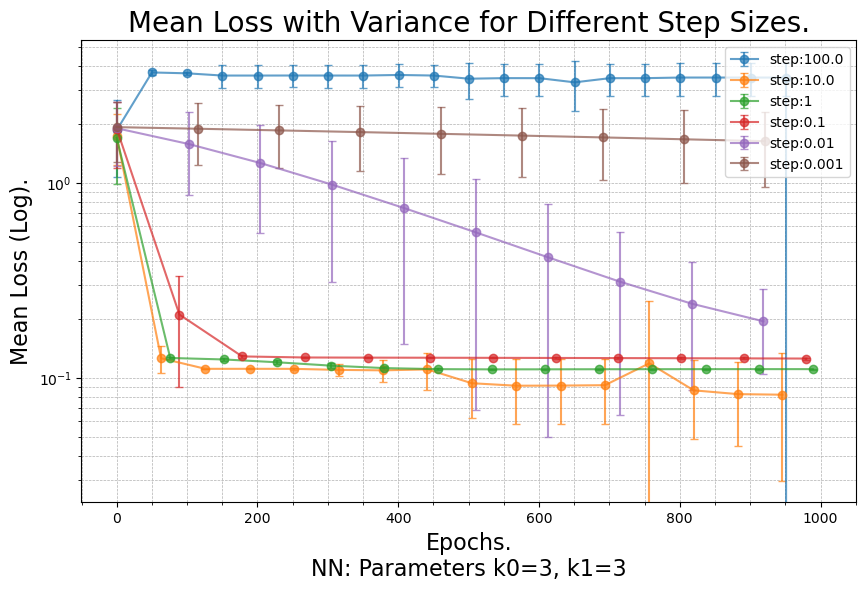

In [53]:
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_results):
    offset = 50 + (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_results[i][::offset]), alpha=0.7,fmt='-o', label=f'step:{test_sizes_list[i]}',capsize=3)
plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0=3, k1=3', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('Mean Loss with Variance for Different Step Sizes.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

<div class='alert alert-info'> [Ex1g] 3) Training method performs: initialization. </div>

In [56]:
num_processes = 4
pool = mp.Pool(processes=num_processes)
def  initializing_NN(theta):
    step_size = 1 
    theta_in = np.array(theta)
    theta,t,loss = compute_trajectory(theta_in,number_of_runs,step_size,Euler,p_force)
    return loss

number_of_runs = 1000
rand_fun =[(np.random.randn, None) ,(np.random.uniform,(-1,1)),(np.random.uniform,(0,1)),(np.random.uniform,(-1,0)),
           (np.zeros,None), (np.ones,None),
           (np.random.normal,(0,1)), (np.random.normal,(0,2)), (np.random.normal,(1,1))] 
mean_results = []
var_results = []
tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
m = len(tdata)
k0 = 3 # Number of input nodes 
k1 = 3 # number of hiddem nodes
dim_theta= k1*(k0 +2) +1
np.random.seed() 

for i,(r_func, args) in enumerate(rand_fun):
    np.random.seed() 
    ran_theta_list = [r_func(*args, dim_theta).tolist() if args else r_func(dim_theta).tolist() for _ in range(20)]
    results = pool.map(initializing_NN, ran_theta_list)

    m,v = calculate_mean_var(results)
    mean_results.append(m)
    var_results.append(v)
pool.close()
pool.join()
    
mean_results = np.array(mean_results)
var_results = np.array(var_results)

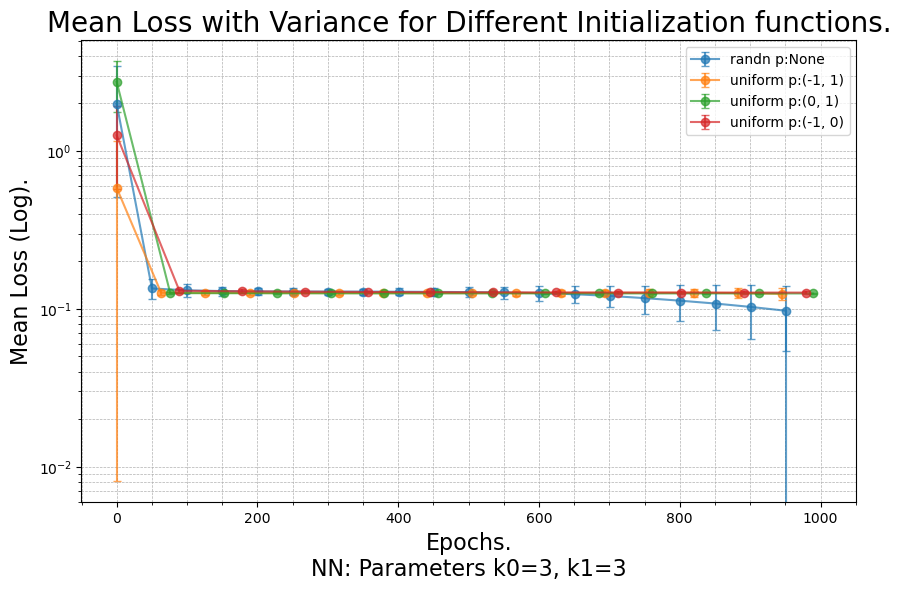

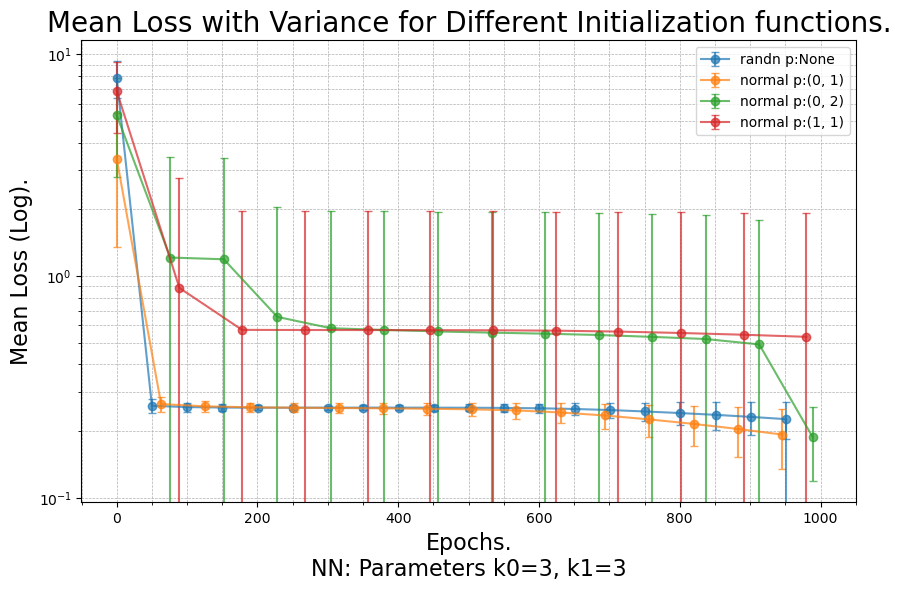

In [57]:
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_results[0:4]):
    offset = 50 + (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_results[i][::offset]), alpha=0.7,fmt='-o', label=f'{toStr(rand_fun[i][0])} p:{rand_fun[i][1]}',capsize=3)
plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0=3, k1=3', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('Mean Loss with Variance for Different Initialization functions.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()
####
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)

mean_slice = mean_results[0]+mean_results[5::]
var_slice = var_results[0]+var_results[5::]
rand_fun_slice = [(np.random.randn, None),  (np.random.normal,(0,1)), (np.random.normal,(0,2)), (np.random.normal,(1,1))] 
for i,r in enumerate(mean_slice):
    offset = 50 + (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_slice[i][::offset]), alpha=0.7,fmt='-o', label=f'{toStr(rand_fun_slice[i][0])} p:{rand_fun_slice[i][1]}',capsize=3)
plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0=3, k1=3', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('Mean Loss with Variance for Different Initialization functions.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

<div class='alert alert-info'> [Ex1g] 3) Training method performs:  number of hidden nodes. </div>

In [20]:
def p_force_k1(k0,k1,theta): 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta)
    dim_theta= k1*(k0 +2) +1
    g = np.zeros(dim_theta)
    loss =calculate_loss(k0,k1,theta)
    g = np.concatenate( gradient_loss_function(k0,k1,theta), axis=None )
    #print(f'g :{g}')
    F = -g
    return F,loss
    
def Euler(k0,k1,q_n,h,vector_field):
    F,loss = vector_field(k0,k1,q_n)
    return q_n+h*F, loss
    
def compute_trajectory_k1(k0,k1,q0, Nsteps, h, step_function, vector_field):
    q_traj = [None]*(Nsteps+1)
    t_traj = [None]*(Nsteps+1)
    loss_traj = [None]*(Nsteps+1)
    

    F,loss = vector_field(k0,k1,q0)
    q_traj[0]= q0
    t_traj[0]=0
    loss_traj[0] = loss

    q=q0.copy()
    t=0

    for n in range(1,Nsteps+1):
        #print(f'####### step {n} #########')
        q,loss = step_function(k0,k1,q,h, vector_field)
        t+=h

        q_traj[n]= q
        t_traj[n]=t
        loss_traj[n] = loss
        #print(f' step {n-1} : {q} ')

    return q_traj, t_traj, loss_traj
    
def gradient_loss_function(k0, k1, theta): 
    # Unpack values of theta 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta) 
    # allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss =0.0

    for i in range(len(tdata)): 
        ## Training data 
        xi = tdata[i][:-1] # take all x data from training data array 
        yi = tdata[i][-1] # The output for x_i 
        ## Hidden layer 
        u1 = np.dot(W1,xi) + b1    
        z1 = sigmoid(u1) # hidden layer outputs
        ## Outputs layers 
        u2 = np.dot( W2.T , z1) +b2 
        z2 = sigmoid(u2) # output
        ## loss 
        res = yi - z2
        loss += res*res 
        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 
    return dW1.ravel(), dW2, db1, np.array([db2])

In [23]:
num_processes = 4
pool = mp.Pool(processes=num_processes)
def hidden_nodes_NN(nodes):
    tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
    m = len(tdata)
    k0 = 3 # Number of input nodes 
    k1 = nodes # number of hiddem nodes
    step_size=1
    dim_theta= k1*(k0 +2) +1
    np.random.seed() 
    theta_in = np.random.rand(dim_theta) 
    theta,t,loss = compute_trajectory_k1(k0,k1,theta_in,number_of_runs,1,Euler,p_force_k1)
    return loss

tdata  = np.array([[i, j, k, (i+j+k)%2 ] for i in range(2) for j in range(2) for k in range(2)])
m = len(tdata)
k0 = 3 # Number of input nodes 
np.random.seed() 
number_of_runs = 1000
hidden_nodes_test =[2,3,4,8,10] 
mean_results = []
var_results = []
for i,h_node in enumerate(hidden_nodes_test):
    tmp = [h_node]*25
    results = pool.map(hidden_nodes_NN, tmp)
    ## 
    m,v = calculate_mean_var(results)
    mean_results.append(m)
    var_results.append(v)
pool.close()
pool.join()
    
mean_results = np.array(mean_results)
var_results = np.array(var_results)

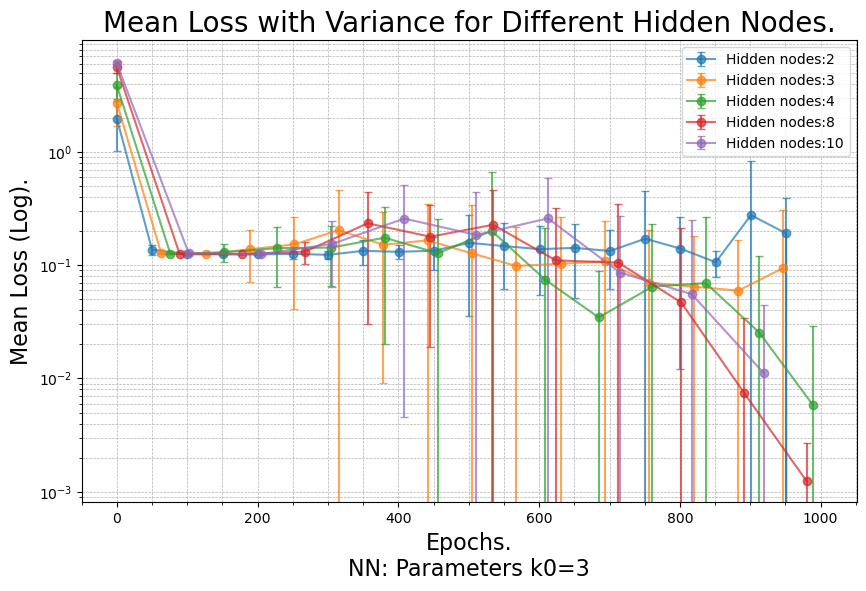

In [24]:
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_results):
    offset = 50 + (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_results[i][::offset]), alpha=0.7,fmt='-o', label=f'Hidden nodes:{hidden_nodes_test[i]}',capsize=3)
plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0=3', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('Mean Loss with Variance for Different Hidden Nodes.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

## Using a neural net to recognize symmetric positive definite Toeplitz matrices
Symmetric Toeplitz matrices are an interesting special class of matrices.  For an introduction see "On Some Properties of Positive Definite Toeplitz Matrices and Their Possible Applications", B. Mukherjee \& S. Maiti, Linear Alg. and Its Applications, 102:211-240 (1988).  A symmetric Toeplitz matrix of dimension $d$ involves $d$ coefficients arranged as follows:
$$
\left [ \begin{array}{cccccc} 
a_0 & a_1 & a_2 & a_3 & \ldots & a_{d-1}\\
a_1 & a_0 & a_1 & a_2 & \ldots & a_{d-2}\\
a_2 & a_1 & a_0 & a_1 & \ldots & a_{d-3}\\
\vdots 
\end{array} \right ]
$$

Question:  when is such a matrix positive definite?  The answer is when the eigenvalues are all positive.  But determining this involves solving for those eigenvalues which might be easy, or not, if the dimension is large.  Can we train a neural network to determine when a given symmetric Toeplitz matrix is positive definite?   

It might sound challenging but that's what you need to try to do in this assignment! 


Let's think about how to set up an SHLP to determine if a given symmetric Toeplitz matrix is positive definite.  The network should clearly have $d$ inputs, since $d$ coefficients characterize the matrix. If we restrict to the 3x3 case, then there are just 3 coefficients or 3 inputs to our network.   We can then have as many hidden nodes as we like (or as many as our computational budget allows) and finally we have a single output which is the decision as to whether the matrix corresponding to the inputs is positive definite or not.  Following the usual practice we use the sigmoidal output gate to reflect a probabilistic interpretation (a number between 0 and 1).

**Training data generation.**
We need to generate some training examples of symmetric Toeplitz matrices.  For each matrix we have one data point.  The data point is a row of a tdata matrix as we defined it earlier.   The first d elements of the row are the coefficients $a_i$ which define the matrix. These can be taken as uniformly distributed random numbers in some interval.   The last number is a 1 or 0 depending on whether the matrix is positive definite.  To compute the eigenvalues of the matrix you can just use the built in numpy eigenvalue solver.  Since the matrices we consider are symmetric, we know they have real eigenvalues.  Generate the eigenvalues and check if all are positive; if so, we know the matrix is positive definite, so the "y" in this case will be 1.  Otherwise it is 0.   It is a good idea to restrict the scaling of the training data to some bounded range, but you can achieve this by simply demanding that all the coefficients lie in the interval $[-1,1]$, (or $[0,1]$), for example.

Generate training data using the above method.  You should write a python function which takes the dimension as input along with the number of desired training data points. Then it should generate a matrix of training data which can be used to train the network.  

In [25]:
def form_toeplitz_matrix(a,d):
    toeplitz = np.zeros( (d,d))
    for i in range(d):
        toeplitz[i,:] = np.roll(a, shift=i)
    return toeplitz

def is_positive_defined(A):
    eigenvalues = np.linalg.eigvals(A)
    return np.all(eigenvalues >0)

def generate_toeplitz_tdata(num, dim):
    # allocate memory 
    tdata = np.zeros((num, dim)) 
    tlabel = np.zeros((num, 1)) 
    
    for i in range(num):
        np.random.seed() 
        tdata[i] = np.random.uniform(-1,1, dim)
        tlabel[i] = int(is_positive_defined(form_toeplitz_matrix(tdata[i], dim)))

    return np.column_stack((tdata, tlabel))

In [26]:
t_data = generate_toeplitz_tdata(5,3)
print(t_data)

[[ 0.02408822 -0.74912535  0.74966013  1.        ]
 [-0.69696663  0.39665045 -0.93645119  0.        ]
 [ 0.92127153  0.76538619 -0.62871048  1.        ]
 [ 0.59145415  0.6292988   0.4414993   1.        ]
 [ 0.62777148 -0.67908054 -0.38114341  0.        ]]


For the $3\times 3$ case, create a training data set and use this to train your network.
Explore the effect of increasing the number of training data points $d$. Try $d=50$, $d=100$, $d=200$, or even more (if your computer is powerful enough).  In each case train the network using the gradient descent method and then test the network. Discuss the training and test accuracy (graph these as functions of the training iteration number).  Also calculate the training and test loss against the iteration number.  Are you able to 'learn' to recognize a $3\times 3$ symmetric positive definite Toeplitz matrix?  

<div class='alert alert-info'> [Ex2b]  3x3 case. </div>

In this analysis, we train a neural network on datasets of different sizes, specifically with d=50, 100, and 200 data points. To achieve this, we define and set up the neural network with k0=3 input nodes and k1=12 hidden layers. The total number of iterations is set to 1000. The training process is executed 20 times with random initial theta values, allowing us to compute the mean and variance for each run with respect to d.

Upon plotting the data, an interesting observation emerges – a larger dataset does not necessarily result in better training. The plot reveals that d=100 achieves a superior training loss compared to both d=50 and d=200.

Additionally, we provide a Confusion Matrix for the given test dataset and generate a larger test dataset. The Confusion Matrix indicates that d=50 performs better than d=100 and d=200. One plausible hypothesis for this behavior is rooted in the nature of the generated data. Specifically, negative matrices appear to be approximately 2/3 more likely than positive matrices. Consequently, the neural network adjusts its weights to favor negative values.

In [30]:
#################################################
#####  Redefine functions for use ###############
#################################################

def calculate_mean_var(size_results):
    mean_values = np.zeros(number_of_runs+1)
    var_values = np.zeros(number_of_runs+1)
    for j in range(number_of_runs):
        tmp = np.zeros(len(size_results))
        for i in range(len(size_results)):
            tmp[i] = size_results[i][j]
        mean_values[j] = np.mean(tmp)
        var_values[j] = np.var(tmp, axis=0)
    return mean_values, var_values

def calculate_loss_q2(k0, k1, theta): 
    res = 0.0
    res_squared = 0.0
    
    for i in range(len(tdata)): # m is the trainning data size 
        x_i = tdata[i][:-1] # take all x data from training data array 
        c_i = tdata[i][-1]  # The output for x_i 
        res += ( neural_network(k0,k1, x_i, theta) - c_i )
        res_squared += res**2
    total_loss= res_squared/len(tdata)

    test_loss = 0 
    for row in test_data:
        x_i = row[:-1] # take all x data from training data array 
        c_i = row[-1]  # The output for x_i 
        test_loss += ( neural_network(k0,k1, x_i, theta) - c_i )**2
    return total_loss, test_loss/len(test_data)


def p_force_q2a(k1,theta, tdata): 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta)
    g = np.zeros(dim_theta)
    train_loss, test_lost =calculate_loss_q2(k0,k1,theta)
    g = np.concatenate( gradient_loss_function(k0,k1,theta,tdata), axis=None )
    F = -g
    return F,train_loss, test_lost
    
def Euler(k1,q_n,h,vector_field, tdata):
    F,train_loss,test_lost = vector_field(k1,q_n, tdata)
    return q_n+h*F,train_loss,test_lost
    
def compute_trajectory_q2a(k1,q0, Nsteps, h, step_function, vector_field, tdata):
    q_traj = [None]*(Nsteps+1)
    t_traj = [None]*(Nsteps+1)
    train_loss_traj = [None]*(Nsteps+1)
    test_loss_traj = [None]*(Nsteps+1)

    F,train_loss,test_lost = vector_field(k1,q0,tdata)
    q_traj[0]= q0
    t_traj[0]= 0
    train_loss_traj[0] = train_loss
    test_loss_traj[0] = test_lost

    q=q0
    t=0

    for n in range(1,Nsteps+1):
        q,train_loss,test_lost = step_function(k1,q,h, vector_field,tdata)
        t+=h

        q_traj[n]= q
        t_traj[n]=t
        train_loss_traj[n] = train_loss
        test_loss_traj[n] = test_lost

    return q_traj, t_traj, train_loss_traj,test_loss_traj
    
def gradient_loss_function(k0, k1, theta, tdata): 
    # Unpack values of theta 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta) 
    # allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss =0.0

    for i in range(len(tdata)): 
        ## Training data 
        xi = tdata[i][:-1] # take all x data from training data array 
        yi = tdata[i][-1] # The output for x_i 
        ## Hidden layer 
        u1 = np.dot(W1,xi) + b1    
        z1 = sigmoid(u1) # hidden layer outputs
        ## Outputs layers 
        u2 = np.dot( W2.T , z1) +b2 
        z2 = sigmoid(u2) # output
        ## loss 
        res = yi - z2
        loss += res*res 
        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 

    db2 /= len(tdata)                              # wrt b2
    dW2 /= len(tdata)                         # wrt w2 
    db1 /= len(tdata)                          # wrt b1
    dW1 /= len(tdata)   # wrt w1 

    
    return dW1.ravel(), dW2, db1, np.array([db2])

In [31]:
def ex_num_training_data(data):
    dim = 3  # Toeplitz matrix dimension
    # Step NN 
    k0 = dim # Number of input nodes 
    k1 = 12 # number of hiddem nodes
    dim_theta= k1*(k0 +2) +1
    np.random.seed() 
    theta_in = np.random.rand(dim_theta) 
    theta,t, train_loss,test_loss = compute_trajectory_q2a(k1,theta_in,number_of_runs,1,Euler,p_force_q2a,data)
    return theta[-1], train_loss, test_loss


pool = mp.Pool(processes=num_processes)
number_of_runs =1000
training_data_points =[50,100,200] 
k0 = 3 # Number of input nodes 
k1 = 12 # number of hiddem node
dim_theta= k1*(k0 +2) +1
dim=k0


tdata_list = [ generate_toeplitz_tdata(d, dim) for d in training_data_points]
test_data = generate_toeplitz_tdata(20, dim)
mean_train_loss = []
var_train_loss = []
mean_test_loss = []
var_test_loss = []
thetas = [] 
for x in tdata_list:
    tmp = [x]*20
    results = pool.map(ex_num_training_data, tmp)
    theta, train_loss, test_loss = zip(*results)
    ###
    thetas.append(theta[-1])
    m,v = calculate_mean_var(train_loss)
    mean_train_loss.append(m)
    var_train_loss.append(v)
    m,v = calculate_mean_var(test_loss)
    mean_test_loss.append(m)
    var_test_loss.append(v)
pool.close()
pool.join()

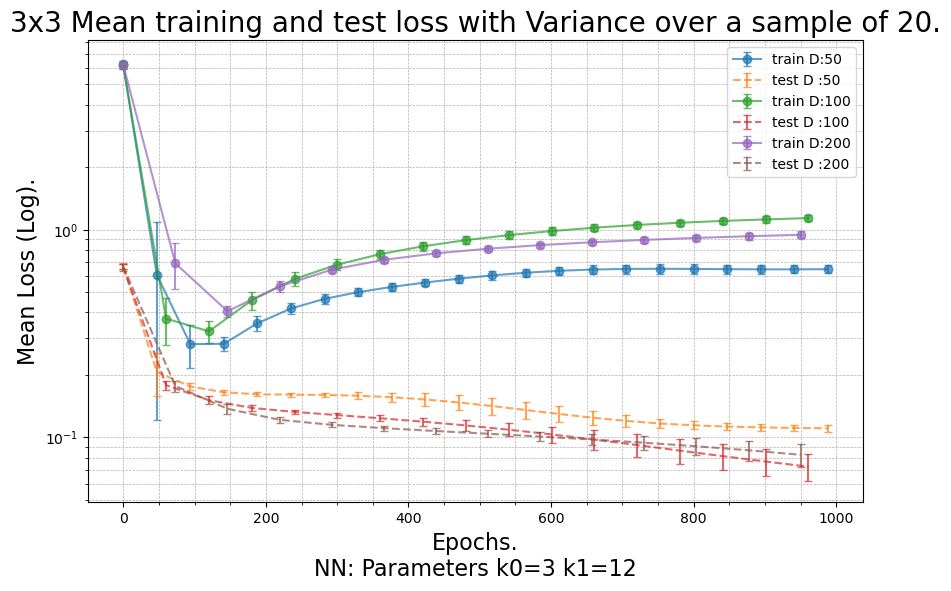

In [32]:
mean_results = np.array(mean_results)
var_results = np.array(var_results)

mean_train_loss = np.array(mean_train_loss)
var_train_loss  = np.array(var_train_loss)
mean_test_loss  = np.array(mean_test_loss)
var_test_loss   = np.array(var_test_loss)
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_train_loss):
    offset = 47+ (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_train_loss[i][::offset]), alpha=0.7,fmt='-o', label=f'train D:{training_data_points[i]}',capsize=3)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], mean_test_loss[i][::offset], yerr=np.sqrt(var_test_loss[i][::offset]), alpha=0.7,fmt='--', label=f'test D :{training_data_points[i]}',capsize=3)

plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0={k0} k1={k1}', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('3x3 Mean training and test loss with Variance over a sample of 20.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

In [33]:
def custom_round(x):
    if x >= 0.5:
        return 1
    else:
        return 0
        
def print_confusion_matrix(num_of_test_point, dim, test_theta,D,test_data):
    #test_data = generate_toeplitz_tdata(num_of_test_point, dim)
    
    # Initialize confusion matrix variables
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    # data 
    number_of_postive =0 
    number_of_negative = 0
    
    for data_row in test_data:
        x_in = data_row[0:dim]
        y_label = int(data_row[-1])
        y = custom_round(neural_network(k0, k1, x_in, test_theta))

        if y_label == 1:
            number_of_postive +=1 
        else:
            number_of_negative +=1
        
    # Check if the prediction is within the margin of error of the actual value
        if y ==  y_label:
            # True positive
            if y == 1 and y_label == 1:
                true_positives += 1
            # True negative
            elif y==0 and y_label == 0:
                true_negatives += 1
        else:
            # False positive
            if y==1 and y_label == 0:
                false_positives += 1
            # False negative
            elif y==0 and y_label == 1:
                false_negatives += 1
    # Print confusion matrix
    print(f" ****** Confusion Matrix: D={D}, eps ={num_of_test_point} ********")
    print(f"                | Actual Positive  |  Actual Negative")
    print(f"Predicted Positive  | {true_positives}          |         {false_positives}")
    print(f"Predicted Negative  | {false_negatives}           |         {true_negatives}")
    # Calculate accuracy and precision
    accuracy = (true_positives + true_negatives) / num_of_test_point
    # Check if there are positive predictions before calculating precision
    denominator_precision = true_positives + false_positives
    precision = true_positives / denominator_precision if denominator_precision != 0 else 0
    print("\nAdditional Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f'Number positive seen : {number_of_postive}. Number of negatives seen {number_of_negative}\n \n')
####################################################################

In [34]:
for i,th in enumerate(thetas):
    print_confusion_matrix(1000,3,th,training_data_points[i],test_data) 

 ****** Confusion Matrix: D=50, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 9          |         1
Predicted Negative  | 0           |         10

Additional Metrics:
Accuracy: 1.90%
Precision: 90.00%
Number positive seen : 9. Number of negatives seen 11
 

 ****** Confusion Matrix: D=100, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 7          |         0
Predicted Negative  | 2           |         11

Additional Metrics:
Accuracy: 1.80%
Precision: 100.00%
Number positive seen : 9. Number of negatives seen 11
 

 ****** Confusion Matrix: D=200, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 5          |         0
Predicted Negative  | 4           |         11

Additional Metrics:
Accuracy: 1.60%
Precision: 100.00%
Number positive seen : 9. Number of negatives seen 11
 



In [35]:
#### for a larger test data set 
test_data_larger = generate_toeplitz_tdata(1000, dim)
for i,th in enumerate(thetas):
    print_confusion_matrix(1000,3,th,training_data_points[i],test_data_larger)

 ****** Confusion Matrix: D=50, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 273          |         33
Predicted Negative  | 13           |         681

Additional Metrics:
Accuracy: 95.40%
Precision: 89.22%
Number positive seen : 286. Number of negatives seen 714
 

 ****** Confusion Matrix: D=100, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 252          |         25
Predicted Negative  | 34           |         689

Additional Metrics:
Accuracy: 94.10%
Precision: 90.97%
Number positive seen : 286. Number of negatives seen 714
 

 ****** Confusion Matrix: D=200, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 226          |         59
Predicted Negative  | 60           |         655

Additional Metrics:
Accuracy: 88.10%
Precision: 79.30%
Number positive seen : 286. Number of negatives seen 714
 



This part is open ended and individual.  Consider a higher dimensional case, at least $5\times 5$ and repeat the previous test.   Are you able to handle such a case?   Here are some ideas for study:  (i) consider using a subsampling approach as discussed at the end of Lecture 6 (see slides), where at each step of the training you only use a fraction of the data to compute the gradient.   Can you improve the training speed or get better generalization (lower test error) in this case? (ii)  You may wish to explore the use of regularization (for example an L2 regularization term also called "weight decay").  (iii) Consider the effect of varying the number of hidden nodes in your network.  How does this affect overfitting/generalization?

<div class='alert alert-info'>   5x5 Case </div>

We will replicate our analysis, this time focusing on 5x5 matrices. 

In [43]:
#################################################
#####  Redefine functions for use ###############
#################################################
def neural_network(k0, k1, x, theta):
    # k0 real inputs 
    # k1 hind networks
    w1,w2,b1,b2 = unpack_theta(k0,k1, theta)
    ## Hidden layer 
    u1 = np.dot(w1,x) + b1    
    z1 = sigmoid(u1) # hidden layer outputs

    ## Outputs layers 
    u2 = np.dot( w2.T , z1) +b2 
    z2 = sigmoid(u2) # output
    return z2

def calculate_mean_var(size_results):
    mean_values = np.zeros(number_of_runs+1)
    var_values = np.zeros(number_of_runs+1)
    for j in range(number_of_runs):
        tmp = np.zeros(len(size_results))
        for i in range(len(size_results)):
            tmp[i] = size_results[i][j]
        mean_values[j] = np.mean(tmp)
        var_values[j] = np.var(tmp, axis=0)
    return mean_values, var_values

def calculate_loss_q2(k0, k1, theta,tdata): 
    res = 0.0
    res_squared = 0.0
    
    for i in range(len(tdata)): # m is the trainning data size 
        x_i = tdata[i][:-1] # take all x data from training data array 
        c_i = tdata[i][-1]  # The output for x_i 
        res += ( neural_network(k0,k1, x_i, theta) - c_i )
        res_squared += res**2
    total_loss= res_squared/len(tdata)

    test_loss = 0 
    for row in test_data:
        x_i = row[:-1] # take all x data from training data array 
        c_i = row[-1]  # The output for x_i 
        test_loss += ( neural_network(k0,k1, x_i, theta) - c_i )**2
    return total_loss, test_loss/len(test_data)


def p_force_q2a(k0,k1,theta, tdata): 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta)
    dim_theta= k1*(k0 +2) +1
    g = np.zeros(dim_theta)
    train_loss, test_lost =calculate_loss_q2(k0,k1,theta,tdata)
    g = np.concatenate( gradient_loss_function(k0,k1,theta,tdata), axis=None )
    F = -g
    return F,train_loss, test_lost
    
def Euler(k0,k1,q_n,h,vector_field, tdata):
    F,train_loss,test_lost = vector_field(k0,k1,q_n, tdata)
    return q_n+h*F,train_loss,test_lost
    
def compute_trajectory_q2a(k0,k1,q0, Nsteps, h, step_function, vector_field, tdata):
    q_traj = [None]*(Nsteps+1)
    t_traj = [None]*(Nsteps+1)
    train_loss_traj = [None]*(Nsteps+1)
    test_loss_traj = [None]*(Nsteps+1)

    F,train_loss,test_lost = vector_field(k0,k1,q0,tdata)
    q_traj[0]= q0
    t_traj[0]= 0
    train_loss_traj[0] = train_loss
    test_loss_traj[0] = test_lost

    q=q0
    t=0

    for n in range(1,Nsteps+1):
        q,train_loss,test_lost = step_function(k0,k1,q,h, vector_field,tdata)
        t+=h

        q_traj[n]= q
        t_traj[n]=t
        train_loss_traj[n] = train_loss
        test_loss_traj[n] = test_lost

    return q_traj, t_traj, train_loss_traj,test_loss_traj
    
def gradient_loss_function(k0, k1, theta, tdata): 
    # Unpack values of theta 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta) 
    # allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss =0.0

    for i in range(len(tdata)): 
        ## Training data 
        xi = tdata[i][:-1] # take all x data from training data array 
        yi = tdata[i][-1] # The output for x_i 
        ## Hidden layer 
        u1 = np.dot(W1,xi) + b1    
        z1 = sigmoid(u1) # hidden layer outputs
        ## Outputs layers 
        u2 = np.dot( W2.T , z1) +b2 
        z2 = sigmoid(u2) # output
        ## loss 
        res = yi - z2
        loss += res*res 
        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 

    db2 /= len(tdata)                              # wrt b2
    dW2 /= len(tdata)                         # wrt w2 
    db1 /= len(tdata)                          # wrt b1
    dW1 /= len(tdata)   # wrt w1 

    
    return dW1.ravel(), dW2, db1, np.array([db2])


In [41]:
def ex_num_training_data(data):
    dim = 5# Toeplitz matrix dimension
    # Step NN 
    k0 = 5 # Number of input nodes 
    k1 = 15 # number of hiddem nodes
    dim_theta= k1*(k0 +2) +1
    np.random.seed() 
    theta_in = np.random.rand(dim_theta) 
    theta,t, train_loss,test_loss = compute_trajectory_q2a(k0,k1,theta_in,number_of_runs,1,Euler,p_force_q2a,data)
    return theta[-1], train_loss, test_loss

In [44]:
num_processes =4
pool = mp.Pool(processes=num_processes)
number_of_runs =1000
training_data_points =[50,100,200] 
k0 = 5 # Number of input nodes 
k1 = 15 # number of hiddem node
dim_theta= k1*(k0 +2) +1
dim=k0

tdata_list = [ generate_toeplitz_tdata(d, dim) for d in training_data_points]
test_data = generate_toeplitz_tdata(20, dim)
mean_train_loss = []
var_train_loss = []
mean_test_loss = []
var_test_loss = []
thetas = [] 

for x in tdata_list:
    tmp = [x]*10
    results = pool.map(ex_num_training_data, tmp)
    theta, train_loss, test_loss = zip(*results)
    ###
    thetas.append(theta[-1])
    m,v = calculate_mean_var(train_loss)
    mean_train_loss.append(m)
    var_train_loss.append(v)
    m,v = calculate_mean_var(test_loss)
    mean_test_loss.append(m)
    var_test_loss.append(v)
pool.close()
pool.join()

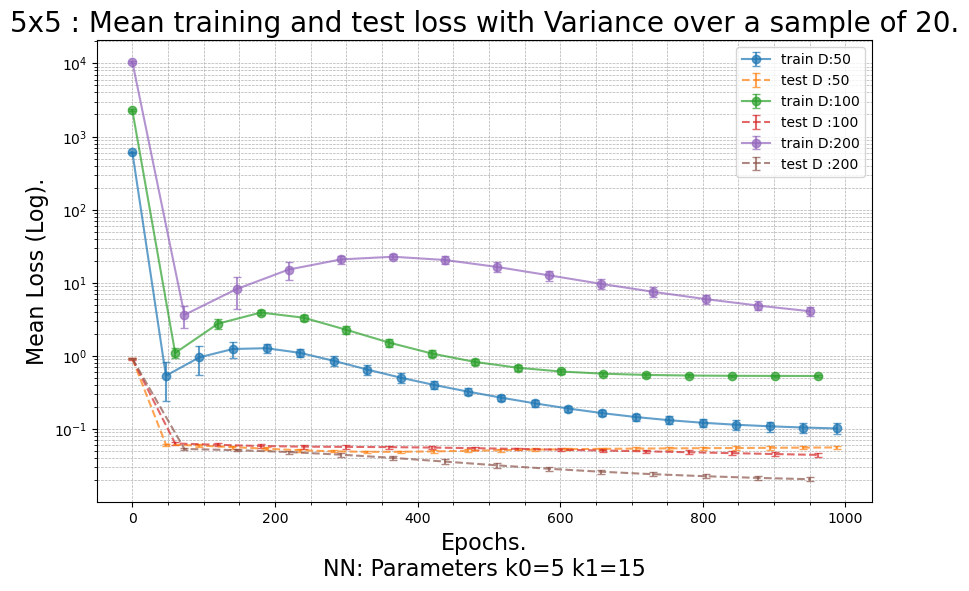

In [45]:
mean_results = np.array(mean_results)
var_results = np.array(var_results)

mean_train_loss = np.array(mean_train_loss)
var_train_loss  = np.array(var_train_loss)
mean_test_loss  = np.array(mean_test_loss)
var_test_loss   = np.array(var_test_loss)
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_train_loss):
    offset = 47+ (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_train_loss[i][::offset]), alpha=0.7,fmt='-o', label=f'train D:{training_data_points[i]}',capsize=3)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], mean_test_loss[i][::offset], yerr=np.sqrt(var_test_loss[i][::offset]), alpha=0.7,fmt='--', label=f'test D :{training_data_points[i]}',capsize=3)

plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0={k0} k1={k1}', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('5x5 : Mean training and test loss with Variance over a sample of 20.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

In [46]:
for i,th in enumerate(thetas):
    print_confusion_matrix(1000,dim,th,training_data_points[i],test_data) 

 ****** Confusion Matrix: D=50, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 2          |         3
Predicted Negative  | 1           |         14

Additional Metrics:
Accuracy: 1.60%
Precision: 40.00%
Number positive seen : 3. Number of negatives seen 17
 

 ****** Confusion Matrix: D=100, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 0          |         2
Predicted Negative  | 3           |         15

Additional Metrics:
Accuracy: 1.50%
Precision: 0.00%
Number positive seen : 3. Number of negatives seen 17
 

 ****** Confusion Matrix: D=200, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 1          |         1
Predicted Negative  | 2           |         16

Additional Metrics:
Accuracy: 1.70%
Precision: 50.00%
Number positive seen : 3. Number of negatives seen 17
 



In [48]:
#### for a larger test data set 
test_data_larger = generate_toeplitz_tdata(1000, dim)
for i,th in enumerate(thetas):
    print_confusion_matrix(1000,dim,th,training_data_points[i],test_data_larger)

 ****** Confusion Matrix: D=50, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 104          |         88
Predicted Negative  | 28           |         780

Additional Metrics:
Accuracy: 88.40%
Precision: 54.17%
Number positive seen : 132. Number of negatives seen 868
 

 ****** Confusion Matrix: D=100, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 66          |         43
Predicted Negative  | 66           |         825

Additional Metrics:
Accuracy: 89.10%
Precision: 60.55%
Number positive seen : 132. Number of negatives seen 868
 

 ****** Confusion Matrix: D=200, eps =1000 ********
                | Actual Positive  |  Actual Negative
Predicted Positive  | 53          |         22
Predicted Negative  | 79           |         846

Additional Metrics:
Accuracy: 89.90%
Precision: 70.67%
Number positive seen : 132. Number of negatives seen 868
 



Lets check for basis in the training data, by making the training data a 50/50 split 

In [70]:
def generate_toeplitz_50split(num, dim):
    # allocate memory
    tdata = np.zeros((num, dim))
    tlabel = np.zeros((num, 1))

    for i in range(num):
        np.random.seed()        
        # Check if randomly generated matrix has positive or negative eigenvalues
        if i % 2 == 0:
            # Force positive eigenvalues
            while True:
                tdata[i] = np.random.uniform(-1, 1, dim)
                toeplitz_matrix = form_toeplitz_matrix(tdata[i], dim)
                if is_positive_defined(toeplitz_matrix):
                    break
        else:
            # Force negative eigenvalues
            while True:
                tdata[i] = np.random.uniform(-1, 1, dim)
                toeplitz_matrix = form_toeplitz_matrix(tdata[i], dim)
                if not is_positive_defined(toeplitz_matrix):
                    break
        
        tlabel[i] = int(is_positive_defined(toeplitz_matrix))

    return np.column_stack((tdata, tlabel))

generate_toeplitz_50split.__name__ = "toeplitz_50split"
generate_toeplitz_tdata.__name__ = "toeplitz"

In [87]:
def print_confusion_matrix(num_of_test_point, dim, test_theta,D,test_data, func):
    #test_data = generate_toeplitz_tdata(num_of_test_point, dim)
    
    # Initialize confusion matrix variables
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    # data 
    number_of_postive =0 
    number_of_negative = 0
    
    for data_row in test_data:
        x_in = data_row[0:dim]
        y_label = int(data_row[-1])
        y = custom_round(neural_network(k0, k1, x_in, test_theta))

        if y_label == 1:
            number_of_postive +=1 
        else:
            number_of_negative +=1
        
    # Check if the prediction is within the margin of error of the actual value
        if y ==  y_label:
            # True positive
            if y == 1 and y_label == 1:
                true_positives += 1
            # True negative
            elif y==0 and y_label == 0:
                true_negatives += 1
        else:
            # False positive
            if y==1 and y_label == 0:
                false_positives += 1
            # False negative
            elif y==0 and y_label == 1:
                false_negatives += 1
    # Print confusion matrix
    print(f" ****** Confusion Matrix:            ********")
    print(f"Trained on: {func[0].__name__}, P: {func[1]}, #data D={D}.")
    print(f"                | Actual Positive  |  Actual Negative")
    print(f"Predicted Positive  | {true_positives}          |         {false_positives}")
    print(f"Predicted Negative  | {false_negatives}           |         {true_negatives}")
    # Calculate accuracy and precision
    accuracy = (true_positives + true_negatives) / num_of_test_point
    # Check if there are positive predictions before calculating precision
    denominator_precision = true_positives + false_positives
    precision = true_positives / denominator_precision if denominator_precision != 0 else 0
    print("\nAdditional Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f'Number positive seen : {number_of_postive}. Number of negatives seen {number_of_negative}\n \n')
####################################################################

In [119]:
t_data = generate_toeplitz_50split(10,5)
print(t_data)

[[ 0.70502209  0.42210642 -0.41863125  0.68608537 -0.79093202  1.        ]
 [ 0.78149206  0.01119915 -0.90033487  0.75737768 -0.8852434   0.        ]
 [ 0.71563477 -0.10240683  0.3094317  -0.09514392 -0.69888192  1.        ]
 [ 0.09410976  0.67733666  0.83620603 -0.73544147  0.83811186  0.        ]
 [ 0.95899279  0.43302216 -0.5116932   0.22776899  0.3640988   1.        ]
 [-0.99656377  0.63309215 -0.5062814  -0.94510119 -0.91960228  0.        ]
 [ 0.95017818 -0.21164232  0.81144941 -0.82161883  0.62312744  1.        ]
 [ 0.42397788  0.43903702  0.52049862 -0.09136058  0.28984313  0.        ]
 [ 0.82916212 -0.18496395  0.61908728 -0.77211207  0.37861933  1.        ]
 [-0.22030979 -0.79869592 -0.19108949 -0.87705727  0.53426782  0.        ]]


In [72]:
num_processes =4
pool = mp.Pool(processes=num_processes)
number_of_runs =1000
training_data_points =[50,100,200] 
k0 = 5 # Number of input nodes 
k1 = 15 # number of hiddem node
dim_theta= k1*(k0 +2) +1
dim=k0

gen_data_func = [ (generate_toeplitz_tdata,(50,dim)), (generate_toeplitz_tdata,(100,dim)),(generate_toeplitz_tdata,(200,dim)), 
                 (generate_toeplitz_50split,(50,dim)),(generate_toeplitz_50split,(100,dim)), (generate_toeplitz_50split,(200,dim))]
test_data = generate_toeplitz_50split(20, dim)
mean_train_loss = []
var_train_loss = []
thetas = [] 

for (func,args) in gen_data_func:
    tmp = [func(*args)]*10
    results = pool.map(ex_num_training_data, tmp)
    theta, train_loss, test_loss = zip(*results)
    ###
    thetas.append(theta[-1])
    m,v = calculate_mean_var(train_loss)
    mean_train_loss.append(m)
    var_train_loss.append(v)
    #m,v = calculate_mean_var(test_loss)
    #mean_test_loss.append(m)
    #var_test_loss.append(v)
pool.close()
pool.join()

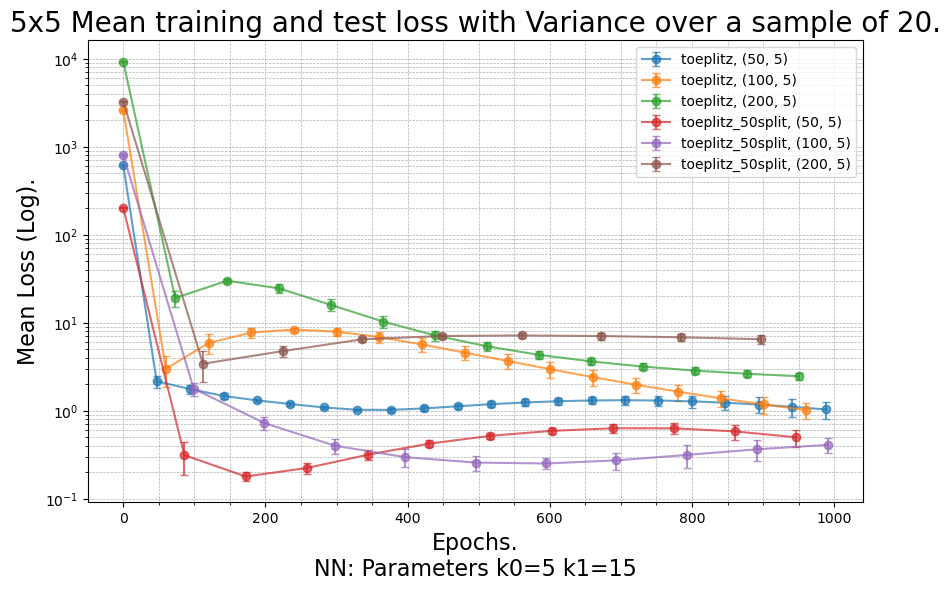

In [77]:
mean_train_loss = np.array(mean_train_loss)
var_train_loss  = np.array(var_train_loss)

# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_train_loss):
    offset = 47+ (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_train_loss[i][::offset]), alpha=0.7,fmt='-o', label=f'{gen_data_func[i][0].__name__}, {gen_data_func[i][1]}',capsize=3)

plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0={k0} k1={k1}', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('5x5 Mean training and test loss with Variance over a sample of 20.',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

In [88]:
#### for a larger test data set  

#### the order is the same for the legend 
test_data_larger = generate_toeplitz_tdata(1000, dim)
test_data_larger_50 = generate_toeplitz_50split(1000, dim)
for i,th in enumerate(thetas):
    print_confusion_matrix(1000,dim,th,training_data_points[i%3],test_data_larger, gen_data_func[i])
    print_confusion_matrix(1000,dim,th,training_data_points[i%3],test_data_larger_50, gen_data_func[i])

 ****** Confusion Matrix:            ********
Trained on: toeplitz, P: (50, 5), #data D=50.
                | Actual Positive  |  Actual Negative
Predicted Positive  | 57          |         59
Predicted Negative  | 63           |         821

Additional Metrics:
Accuracy: 87.80%
Precision: 49.14%
Number positive seen : 120. Number of negatives seen 880
 

 ****** Confusion Matrix:            ********
Trained on: toeplitz, P: (50, 5), #data D=50.
                | Actual Positive  |  Actual Negative
Predicted Positive  | 237          |         33
Predicted Negative  | 263           |         467

Additional Metrics:
Accuracy: 70.40%
Precision: 87.78%
Number positive seen : 500. Number of negatives seen 500
 

 ****** Confusion Matrix:            ********
Trained on: toeplitz, P: (100, 5), #data D=100.
                | Actual Positive  |  Actual Negative
Predicted Positive  | 56          |         31
Predicted Negative  | 64           |         849

Additional Metrics:
Accuracy: 90.50%


In the analysis of utilizing a neural network for the recognition of symmetric positive definite Toeplitz matrices, noteworthy observations emerge. Examining the training loss plot, it becomes evident that the neural network, trained on unbiased data at dimensionality D=100, exhibited optimal learning rates after 1000 iterations. This aligns with the overarching trend of unbiased data neural networks outperforming their biased data counterparts; however, an interesting deviation is observed at D=200, where this trend is disrupted.

Further insights are gained through the confusion matrix, informing us on the performance of each trained neural network (NN). Notably, in the case of biased data-trained NNs (BTNN), higher accuracy is achieved, whereas for unbiased data-trained NNs (UTNN), comparable accuracy is observed for both biased and unbiased datasets. Intriguingly, BTNN displays an increase in precision when applied to unbiased data, accompanied by a significant rise in False Positive instances. Conversely, UTNN exhibits improved precision on unbiased data but with a notable inclination towards false negatives.



In [134]:
def stochastic_gradient_loss_function(k0, k1, theta, tdata):
    # Unpack values of theta 
    W1, W2, b1, b2 = unpack_theta(k0, k1, theta) 
    # Allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss = 0.0

    # Shuffle the training data to implement stochasticity
    m = int(len(tdata))
    for i in range(m):
        random_index = np.random.randint(len(tdata))
        # Training data 
        xi = tdata[random_index][:-1]  # Take all x data from training data array 
        yi = tdata[random_index][-1]   # The output for xi 

        # Hidden layer 
        u1 = np.dot(W1, xi) + b1    
        z1 = sigmoid(u1)  # Hidden layer outputs

        # Outputs layers 
        u2 = np.dot(W2.T, z1) + b2 
        z2 = sigmoid(u2)  # Output

        # Loss 
        res = yi - z2
        loss += res * res

        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 

    db2 /= m                            # wrt b2
    dW2 /= m                         # wrt w2 
    db1 /= m                         # wrt b1
    dW1 /= m   # wrt w1 


    return W1.ravel(), W2, b1, np.array([b2])
def stochastic_gradient_loss_function1(k0, k1, theta, tdata):
    # Unpack values of theta 
    W1, W2, b1, b2 = unpack_theta(k0, k1, theta) 
    # Allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss = 0.0

    # Shuffle the training data to implement stochasticity
    m = int(len(tdata)/2)
    for i in range(m):
        random_index = np.random.randint(len(tdata))
        # Training data 
        xi = tdata[random_index][:-1]  # Take all x data from training data array 
        yi = tdata[random_index][-1]   # The output for xi 

        # Hidden layer 
        u1 = np.dot(W1, xi) + b1    
        z1 = sigmoid(u1)  # Hidden layer outputs

        # Outputs layers 
        u2 = np.dot(W2.T, z1) + b2 
        z2 = sigmoid(u2)  # Output

        # Loss 
        res = yi - z2
        loss += res * res

        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 

    db2 /= m                            # wrt b2
    dW2 /= m                         # wrt w2 
    db1 /= m                         # wrt b1
    dW1 /= m   # wrt w1 


    return W1.ravel(), W2, b1, np.array([b2])

def stochastic_gradient_loss_function2(k0, k1, theta, tdata):
    # Unpack values of theta 
    W1, W2, b1, b2 = unpack_theta(k0, k1, theta) 
    # Allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss = 0.0

    # Shuffle the training data to implement stochasticity
    m = int(len(tdata)/4)
    for i in range(m):
        random_index = np.random.randint(len(tdata))
        # Training data 
        xi = tdata[random_index][:-1]  # Take all x data from training data array 
        yi = tdata[random_index][-1]   # The output for xi 

        # Hidden layer 
        u1 = np.dot(W1, xi) + b1    
        z1 = sigmoid(u1)  # Hidden layer outputs

        # Outputs layers 
        u2 = np.dot(W2.T, z1) + b2 
        z2 = sigmoid(u2)  # Output

        # Loss 
        res = yi - z2
        loss += res * res

        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 

    db2 /= m                            # wrt b2
    dW2 /= m                         # wrt w2 
    db1 /= m                         # wrt b1
    dW1 /= m   # wrt w1 


    return W1.ravel(), W2, b1, np.array([b2])
    
    
def calculate_loss_q2c(k0, k1, theta,tdata): 
    res = 0.0
    res_squared = 0.0
    
    for i in range(len(tdata)): # m is the trainning data size 
        x_i = tdata[i][:-1] # take all x data from training data array 
        c_i = tdata[i][-1]  # The output for x_i 
        res += ( neural_network(k0,k1, x_i, theta) - c_i )
        res_squared += res**2
    total_loss= res_squared/len(tdata)

    test_loss = 0 
    for row in test_data:
        x_i = row[:-1] # take all x data from training data array 
        c_i = row[-1]  # The output for x_i 
        test_loss += ( neural_network(k0,k1, x_i, theta) - c_i )**2
    return total_loss, test_loss/len(test_data)


def p_force_q2c(k0,k1,theta, tdata,func): 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta)
    dim_theta= k1*(k0 +2) +1
    g = np.zeros(dim_theta)
    train_loss, test_lost =calculate_loss_q2c(k0,k1,theta,tdata)
    g = np.concatenate(func(k0,k1,theta,tdata), axis=None )
    F = -g
    return F,train_loss, test_lost
    
def Euler(k0,k1,q_n,h,vector_field,tdata,func):
    F,train_loss,test_lost = vector_field(k0,k1,q_n,tdata,func)
    return q_n+h*F,train_loss,test_lost
    
def compute_trajectory_q2c(k0,k1,q0, Nsteps, h, step_function, vector_field, tdata,func):
    q_traj = [None]*(Nsteps+1)
    t_traj = [None]*(Nsteps+1)
    train_loss_traj = [None]*(Nsteps+1)
    test_loss_traj = [None]*(Nsteps+1)

    F,train_loss,test_lost = vector_field(k0,k1,q0,tdata,func)
    q_traj[0]= q0
    t_traj[0]= 0
    train_loss_traj[0] = train_loss
    test_loss_traj[0] = test_lost

    q=q0
    t=0

    for n in range(1,Nsteps+1):
        q,train_loss,test_lost = step_function(k0,k1,q,h,vector_field,tdata,func)
        t+=h

        q_traj[n]= q
        t_traj[n]=t
        train_loss_traj[n] = train_loss
        test_loss_traj[n] = test_lost

    return q_traj, t_traj, train_loss_traj,test_loss_traj
    
def gradient_loss_function(k0, k1, theta, tdata): 
    # Unpack values of theta 
    W1,W2,b1,b2 = unpack_theta(k0,k1,theta) 
    # allocate memory for output 
    dW1 = np.zeros_like(W1.flatten())
    dW2 = np.zeros_like(W2)
    db1 = np.zeros_like(b1)
    db2 = np.zeros_like(b2)
    loss =0.0

    m = int(len(tdata))

    for i in range(m): 
        ## Training data 
        xi = tdata[i][:-1] # take all x data from training data array 
        yi = tdata[i][-1] # The output for x_i 
        ## Hidden layer 
        u1 = np.dot(W1,xi) + b1    
        z1 = sigmoid(u1) # hidden layer outputs
        ## Outputs layers 
        u2 = np.dot( W2.T , z1) +b2 
        z2 = sigmoid(u2) # output
        ## loss 
        res = yi - z2
        loss += res*res 
        ##Gradient
        h3 = -2 * res * sigmoid_prime(u2) 
        h1 = h3 * sigmoid_prime(u1)                                                               
        db2 += h3                               # wrt b2
        dW2 += z1 * h3                          # wrt w2 
        db1 += h1 * W2                          # wrt b1
        dW1 += np.transpose( np.outer(xi, h1) * W2).flatten()   # wrt w1 

    db2 /= m                             # wrt b2
    dW2 /= m                         # wrt w2 
    db1 /= m                         # wrt b1
    dW1 /= m   # wrt w1 

    
    return dW1.ravel(), dW2, db1, np.array([db2])


In [135]:
def ex_stochastic(func):
    dim = 5  # Toeplitz matrix dimension
    # Step NN 
    k0 = dim # Number of input nodes 
    k1 = 15 # number of hiddem nodes
    dim_theta= k1*(k0 +2) +1
    np.random.seed() 
    data = generate_toeplitz_50split(100,5)
    theta_in = np.random.rand(dim_theta) 
    theta,t, train_loss,test_loss = compute_trajectory_q2c(k0,k1,theta_in,number_of_runs,1,Euler,p_force_q2c,data, func)
    return theta[-1], train_loss


num_processes =4
pool = mp.Pool(processes=num_processes)
number_of_runs =1000
k0 = 5 # Number of input nodes 
k1 = 15 # number of hiddem node
dim_theta= k1*(k0 +2) +1
dim=k0
gradient_loss_functions = [ stochastic_gradient_loss_function,stochastic_gradient_loss_function1,stochastic_gradient_loss_function2, gradient_loss_function]

mean_train_loss = []
var_train_loss = []
thetas = [] 

for func in gradient_loss_functions:
    tmp = [func]*10
    results = pool.map(ex_stochastic, tmp)
    theta, train_loss = zip(*results)
    ###
    thetas.append(theta[-1])
    m,v = calculate_mean_var(train_loss)
    mean_train_loss.append(m)
    var_train_loss.append(v)

pool.close()
pool.join()

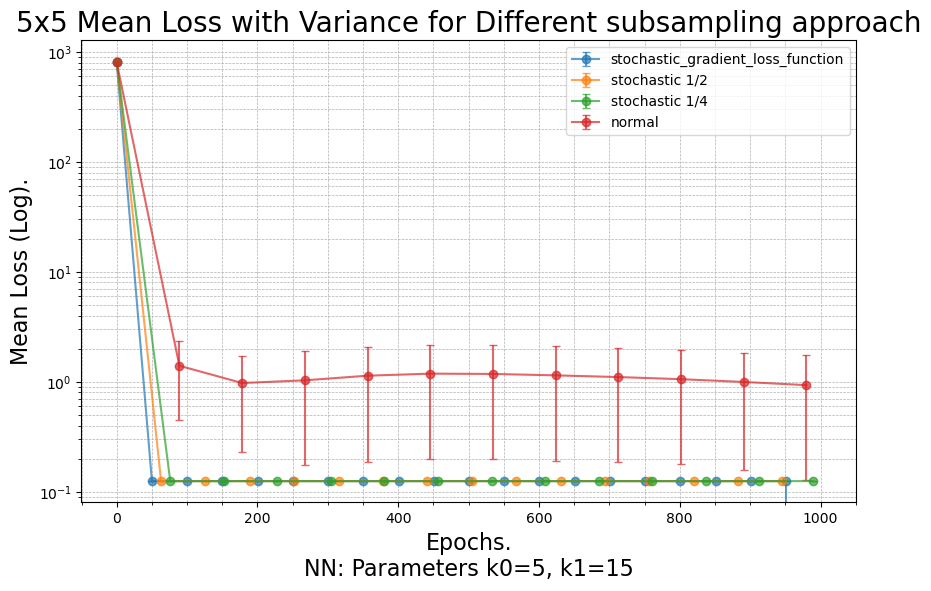

In [137]:
stochastic_gradient_loss_function1.__name__ = "stochastic 1"
stochastic_gradient_loss_function1.__name__ = "stochastic 1/2"
stochastic_gradient_loss_function2.__name__ = "stochastic 1/4"
gradient_loss_function.__name__ = "normal"

mean_results = np.array(mean_train_loss)
var_results = np.array(var_train_loss)
# Plot line plot with error bars representing variance
plt.figure(figsize=(10, 6))
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
for i,r in enumerate(mean_results):
    offset = 50 + (i*13)
    plt.errorbar(np.linspace(0, number_of_runs + 1, number_of_runs+1)[::offset], r[::offset], yerr=np.sqrt(var_results[i][::offset]), alpha=0.7,fmt='-o', label=f'{gradient_loss_functions[i].__name__}',capsize=3)
plt.yscale('log')  # Set x-axis to log scale for better visualization
plt.xlabel(f'Epochs.\nNN: Parameters k0={k0}, k1={k1}', size=16)
plt.ylabel('Mean Loss (Log).', size=16)
plt.title('5x5 Mean Loss with Variance for Different subsampling approach',size=20)
plt.legend(fontsize='medium',loc='upper right')
plt.show()

In [138]:
def print_confusion_matrix(num_of_test_point, dim, test_theta,D,test_data, func):
    #test_data = generate_toeplitz_tdata(num_of_test_point, dim)
    
    # Initialize confusion matrix variables
    true_positives = 0
    false_positives = 0
    true_negatives = 0
    false_negatives = 0
    # data 
    number_of_postive =0 
    number_of_negative = 0
    
    for data_row in test_data:
        x_in = data_row[0:dim]
        y_label = int(data_row[-1])
        y = custom_round(neural_network(k0, k1, x_in, test_theta))

        if y_label == 1:
            number_of_postive +=1 
        else:
            number_of_negative +=1
        
    # Check if the prediction is within the margin of error of the actual value
        if y ==  y_label:
            # True positive
            if y == 1 and y_label == 1:
                true_positives += 1
            # True negative
            elif y==0 and y_label == 0:
                true_negatives += 1
        else:
            # False positive
            if y==1 and y_label == 0:
                false_positives += 1
            # False negative
            elif y==0 and y_label == 1:
                false_negatives += 1
    # Print confusion matrix
    print(f" ****** Confusion Matrix:            ********")
    print(f"Trained on: {func.__name__}, #data D={D}.")
    print(f"                | Actual Positive  |  Actual Negative")
    print(f"Predicted Positive  | {true_positives}          |         {false_positives}")
    print(f"Predicted Negative  | {false_negatives}           |         {true_negatives}")
    # Calculate accuracy and precision
    accuracy = (true_positives + true_negatives) / num_of_test_point
    # Check if there are positive predictions before calculating precision
    denominator_precision = true_positives + false_positives
    precision = true_positives / denominator_precision if denominator_precision != 0 else 0
    print("\nAdditional Metrics:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f'Number positive seen : {number_of_postive}. Number of negatives seen {number_of_negative}\n \n')
####################################################################

In [139]:
#### for a larger test data set  

#### the order is the same for the legend 
test_data_larger = generate_toeplitz_tdata(1000, dim)
test_data_larger_50 = generate_toeplitz_50split(1000, dim)
for i,th in enumerate(thetas):
    print_confusion_matrix(1000,dim,th,100,test_data_larger, gradient_loss_functions[i])

 ****** Confusion Matrix:            ********
Trained on: stochastic_gradient_loss_function, #data D=100.
                | Actual Positive  |  Actual Negative
Predicted Positive  | 124          |         876
Predicted Negative  | 0           |         0

Additional Metrics:
Accuracy: 12.40%
Precision: 12.40%
Number positive seen : 124. Number of negatives seen 876
 

 ****** Confusion Matrix:            ********
Trained on: stochastic 1/2, #data D=100.
                | Actual Positive  |  Actual Negative
Predicted Positive  | 124          |         876
Predicted Negative  | 0           |         0

Additional Metrics:
Accuracy: 12.40%
Precision: 12.40%
Number positive seen : 124. Number of negatives seen 876
 

 ****** Confusion Matrix:            ********
Trained on: stochastic 1/4, #data D=100.
                | Actual Positive  |  Actual Negative
Predicted Positive  | 124          |         876
Predicted Negative  | 0           |         0

Additional Metrics:
Accuracy: 12.40%
Pre

In your answers, concentrate on understanding how your method can be evaluated, how general and robust it is, how you can evaluate accuracy and convergence rate, the relationship between training and test error, and concepts like overfitting.  What goes wrong if the training data is too limited?  How useful would the method be in practice?  How does its performance scale with increase in dimension.   When a method works well it does not teach you much.  When it fails you can often learn a lot more about the problem!
